<a href="https://colab.research.google.com/github/yyoungseo/project_03/blob/main/%EB%B6%84%EC%84%9D%20%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 환경설정

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 폰트 설정
!pip install koreanize_matplotlib -q
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.4 MB/s eta 0:00:00


In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 불러오기

In [ ]:
customers_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/olist_customers_dataset.csv'
customers_df = pd.read_csv(customers_data_path, encoding='utf-8')
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
orders_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/olist_orders_dataset.csv'
orders_df = pd.read_csv(orders_data_path)

# datetime
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
orders_items_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/olist_order_items_dataset.csv'
orders_items_df = pd.read_csv(orders_items_data_path)

# datetime
time_cols = ['shipping_limit_date']
for col in time_cols:
    orders_items_df[col] = pd.to_datetime(orders_items_df[col])

orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
products_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/olist_products_dataset.csv'
products_df = pd.read_csv(products_data_path)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
sellers_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/olist_sellers_dataset.csv'
sellers_df = pd.read_csv(sellers_data_path)
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
order_payments_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/olist_order_payments_dataset.csv'
order_payments_df = pd.read_csv(order_payments_data_path)
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_reviews_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/olist_order_reviews_dataset.csv'
order_reviews_df = pd.read_csv(order_reviews_data_path)

# datetime
time_cols = ['review_creation_date']
for col in time_cols:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
category_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/99_스프린트미션/미션11/archive/product_category_name_translation.csv'
category_df = pd.read_csv(category_data_path)
category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# 3. EDA

## SQL을 통한 ERD 제작

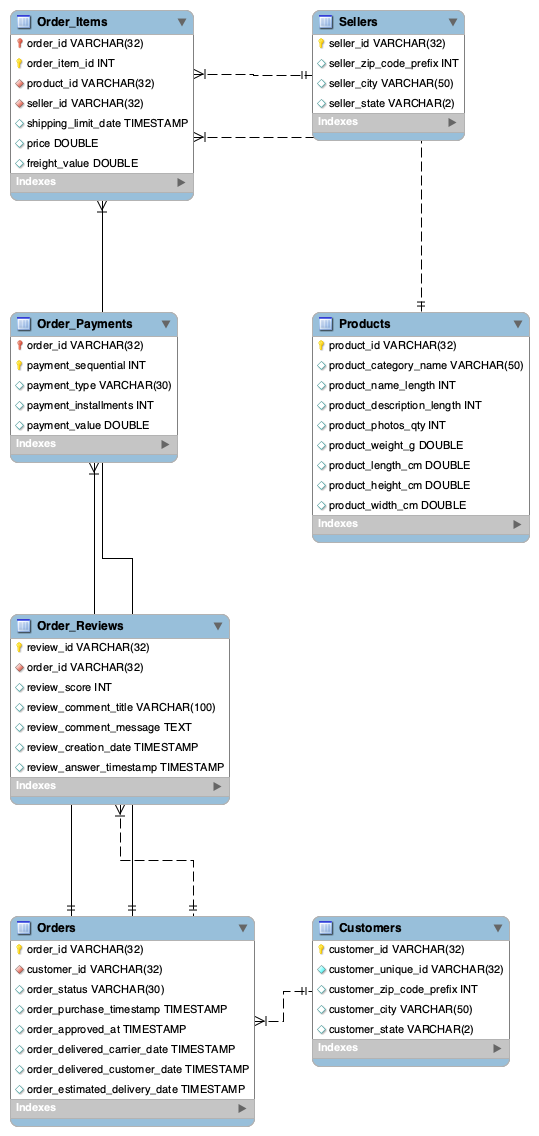

## 3-1. Customers 테이블 EDA

In [ ]:
# 1. Customers 테이블 EDA
print("\n--- 1. Customers 테이블 EDA ---")
print("\n데이터 정보:")
print(customers_df.info())
print("\n결측치 확인:")
print(customers_df.isnull().sum())


--- 1. Customers 테이블 EDA ---

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

결측치 확인:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


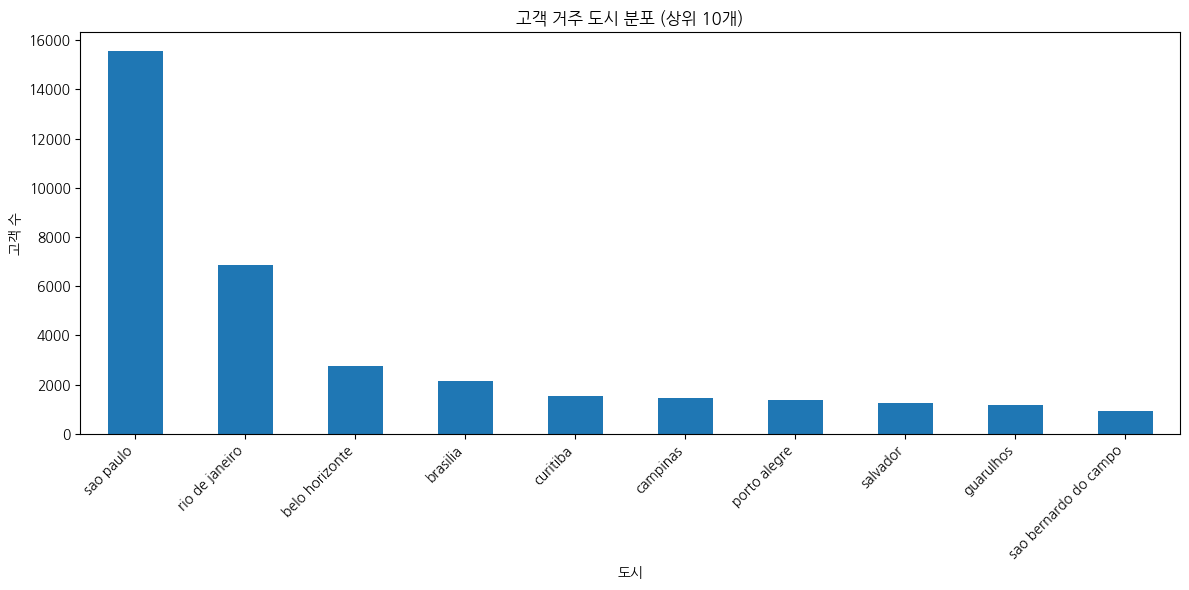

In [ ]:
# 고객이 거주하는 도시 분포 (상위 10개)
plt.figure(figsize=(12, 6))
customers_df['customer_city'].value_counts().nlargest(10).plot(kind='bar')
plt.title('고객 거주 도시 분포 (상위 10개)')
plt.xlabel('도시')
plt.ylabel('고객 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

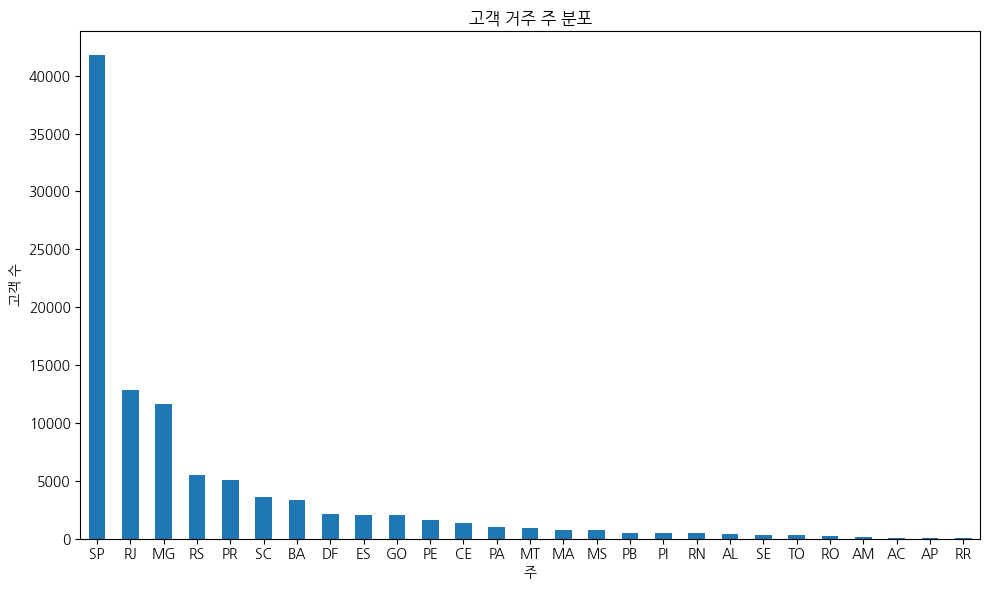

In [ ]:
# 고객이 거주하는 주 분포
plt.figure(figsize=(10, 6))
customers_df['customer_state'].value_counts().plot(kind='bar')
plt.title('고객 거주 주 분포')
plt.xlabel('주')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 각 고객별 주문 수 (Orders 테이블과 연결)
customer_orders = orders_df.groupby('customer_id')['order_id'].count()
print("\n각 고객별 주문 수 (상위 10개):")
print(customer_orders.nlargest(10))


각 고객별 주문 수 (상위 10개):
customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
0004164d20a9e969af783496f3408652    1
000419c5494106c306a97b5635748086    1
00046a560d407e99b969756e0b10f282    1
00050bf6e01e69d5c0fd612f1bcfb69c    1
000598caf2ef4117407665ac33275130    1
Name: order_id, dtype: int64


In [ ]:
# 각 고객별 결제 수량 (Order Payments 테이블과 연결)
customer_payments = pd.merge(orders_df, order_payments_df, on='order_id', how='left')
customer_payment_counts = customer_payments.groupby('customer_id')['payment_sequential'].count()
print("\n각 고객별 결제 수량 (상위 10개):")
print(customer_payment_counts.nlargest(10))


각 고객별 결제 수량 (상위 10개):
customer_id
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
b246eeed30b362c09d867b9e598bee51    22
270c23a11d024a44c896d1894b261a83    21
13aa59158da63ba0e93ec6ac2c07aacb    19
eed931d3a5222a9a511d18be7fd2a5ba    19
1eebfdb7083031b40f727fb71f6cd5b2    15
de832e8dbb1f588a47013e53feaa67cc    15
7bb57d182bdc11653fac1593436df8bf    14
d1ea705f2fdd8f98eff86c2691652e60    14
Name: payment_sequential, dtype: int64


## 3-2. Orders 테이블 EDA

In [ ]:
print("\n--- 2. Orders 테이블 EDA ---")
print("\n데이터 정보:")
print(orders_df.info())
print("\n결측치 확인:")
print(orders_df.isnull().sum())


--- 2. Orders 테이블 EDA ---

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

결측치 확인:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrie

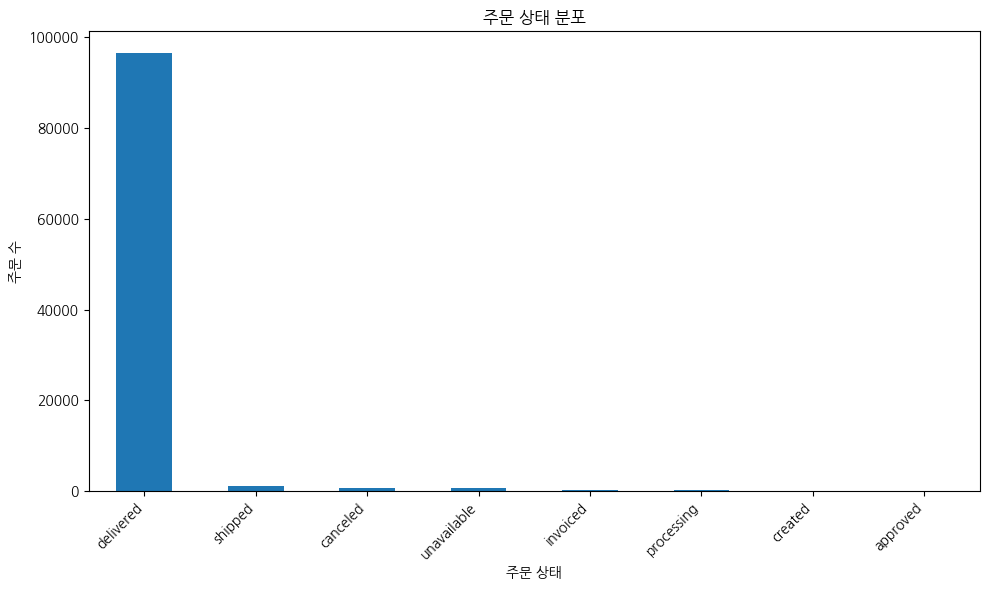

In [ ]:
# 주문 상태 분포
plt.figure(figsize=(10, 6))
orders_df['order_status'].value_counts().plot(kind='bar')
plt.title('주문 상태 분포')
plt.xlabel('주문 상태')
plt.ylabel('주문 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 구매 및 배송 관련 시간 분석
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

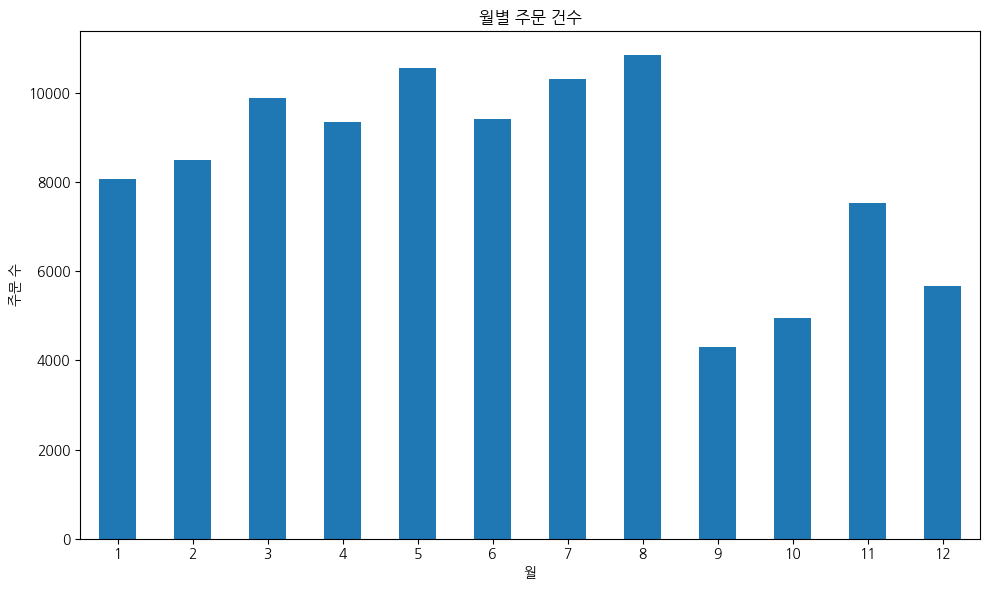

In [ ]:
# 주문 생성 시각 분포 (월별)
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month
plt.figure(figsize=(10, 6))
orders_df['purchase_month'].value_counts().sort_index().plot(kind='bar')
plt.title('월별 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 배송 시간 분석 (배송 완료된 주문 대상)
delivered_orders = orders_df[orders_df['order_status'] == 'delivered'].copy()
delivered_orders['delivery_time'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days
print("\n배송 시간 통계 (일):")
print(delivered_orders['delivery_time'].describe())


배송 시간 통계 (일):
count    96470.000000
mean        12.093604
std          9.551380
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64


## 3.3 Order Items 테이블 EDA

In [ ]:
# 3. Order Items 테이블 EDA
print("\n--- 3. Order Items 테이블 EDA ---")
print("\n데이터 정보:")
print(orders_items_df.info())
print("\n결측치 확인:")
print(orders_items_df.isnull().sum())


--- 3. Order Items 테이블 EDA ---

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

결측치 확인:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


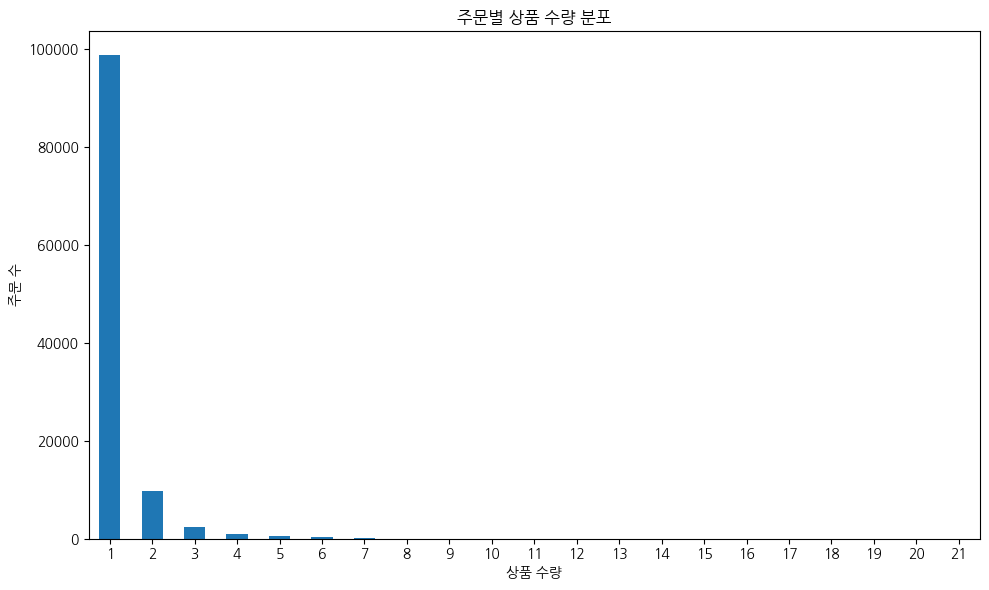

In [ ]:
# 각 주문에 포함된 상품 수량 분포
plt.figure(figsize=(10, 6))
orders_items_df['order_item_id'].value_counts().plot(kind='bar')
plt.title('주문별 상품 수량 분포')
plt.xlabel('상품 수량')
plt.ylabel('주문 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

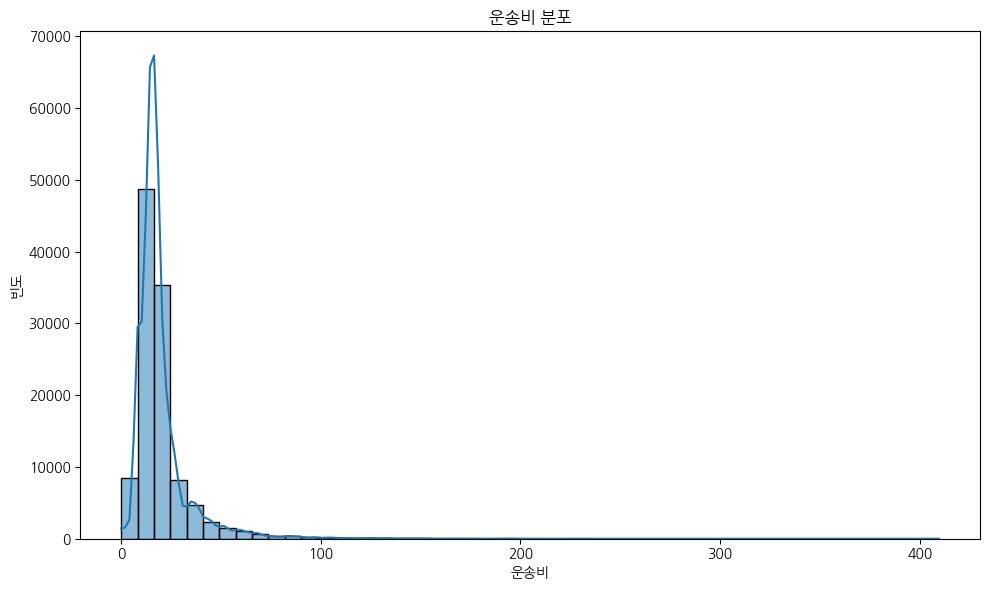


운송비 통계:
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64


In [ ]:
# 운송비 (freight_value) 분포
plt.figure(figsize=(10, 6))
sns.histplot(orders_items_df['freight_value'], bins=50, kde=True)
plt.title('운송비 분포')
plt.xlabel('운송비')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()
print("\n운송비 통계:")
print(orders_items_df['freight_value'].describe())

## 3-4. Products 테이블 EDA

In [ ]:
print("\n--- 4. Products 테이블 EDA ---")
print("\n데이터 정보:")
print(products_df.info())
print("\n결측치 확인:")
print(products_df.isnull().sum())


--- 4. Products 테이블 EDA ---

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

결측치 확인:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty       

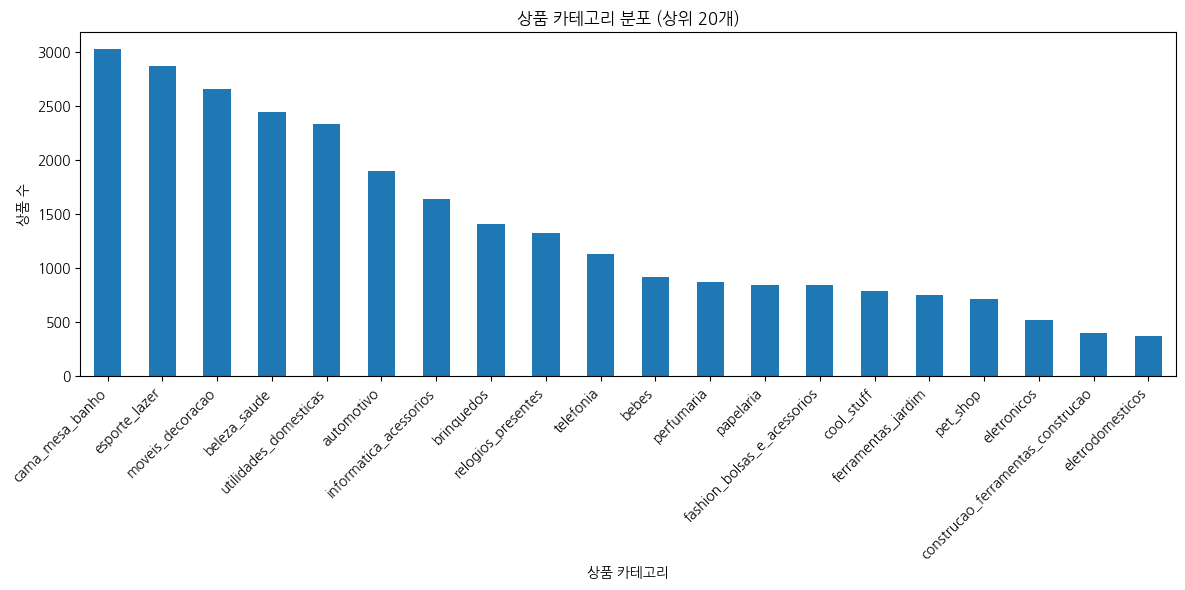

In [ ]:
# 상품 카테고리 분포
plt.figure(figsize=(12, 6))
products_df['product_category_name'].value_counts().nlargest(20).plot(kind='bar')
plt.title('상품 카테고리 분포 (상위 20개)')
plt.xlabel('상품 카테고리')
plt.ylabel('상품 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

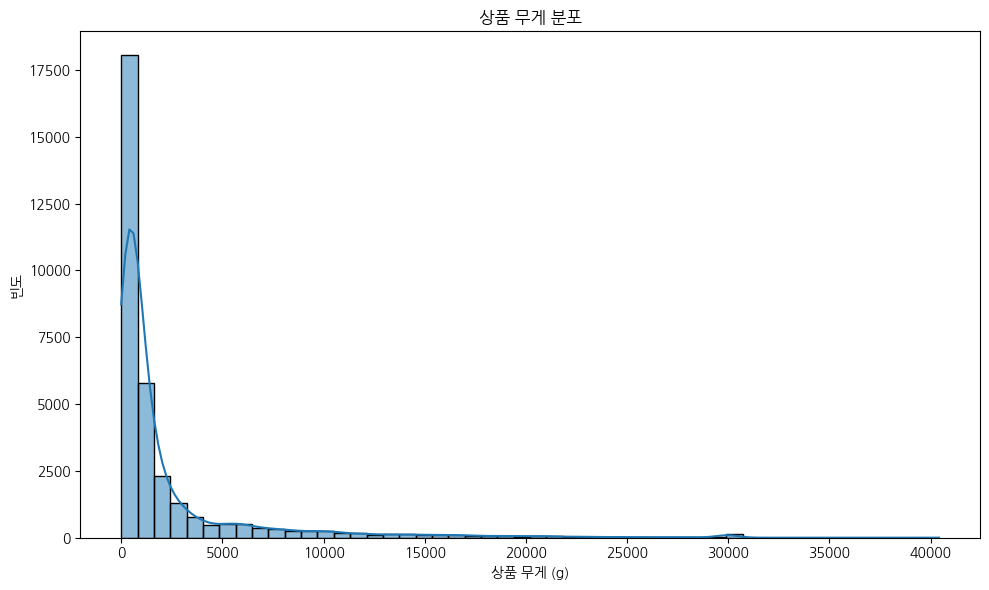


상품 무게 통계:
count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64


In [ ]:
# 상품 무게 분포
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_weight_g'].dropna(), bins=50, kde=True)
plt.title('상품 무게 분포')
plt.xlabel('상품 무게 (g)')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()
print("\n상품 무게 통계:")
print(products_df['product_weight_g'].describe())

## 3-5. Sellers 테이블 EDA

In [ ]:
print("\n--- 5. Sellers 테이블 EDA ---")
print("\n데이터 정보:")
print(sellers_df.info())
print("\n결측치 확인:")
print(sellers_df.isnull().sum())


--- 5. Sellers 테이블 EDA ---

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

결측치 확인:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


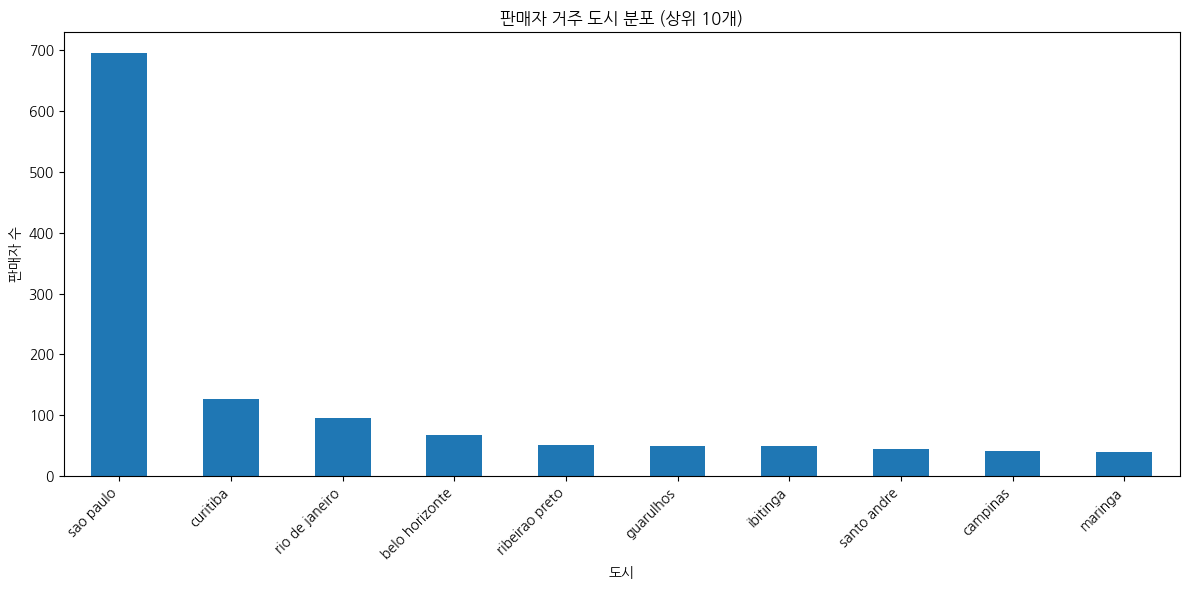

In [ ]:
# 판매자 거주 도시 분포 (상위 10개)
plt.figure(figsize=(12, 6))
sellers_df['seller_city'].value_counts().nlargest(10).plot(kind='bar')
plt.title('판매자 거주 도시 분포 (상위 10개)')
plt.xlabel('도시')
plt.ylabel('판매자 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

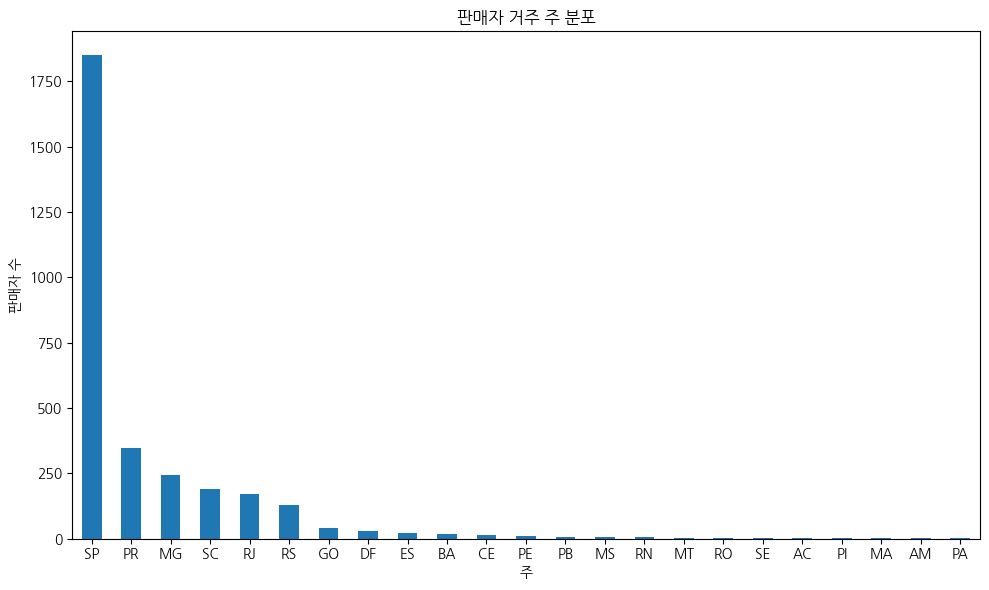

In [ ]:
# 판매자 거주 주 분포
plt.figure(figsize=(10, 6))
sellers_df['seller_state'].value_counts().plot(kind='bar')
plt.title('판매자 거주 주 분포')
plt.xlabel('주')
plt.ylabel('판매자 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 각 판매자의 판매 활동 (주문 수 - Order Items 테이블과 연결)
seller_orders = pd.merge(orders_items_df, orders_df, on='order_id', how='left')
seller_order_counts = seller_orders.groupby('seller_id')['order_id'].nunique()
print("\n각 판매자의 주문 수 (상위 10개):")
print(seller_order_counts.nlargest(10))


각 판매자의 주문 수 (상위 10개):
seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
955fee9216a65b617aa5c0531780ce60    1287
7a67c85e85bb2ce8582c35f2203ad736    1160
ea8482cd71df3c1969d7b9473ff13abc    1146
4869f7a5dfa277a7dca6462dcf3b52b2    1132
3d871de0142ce09b7081e2b9d1733cb1    1080
Name: order_id, dtype: int64


## 3-6. Order Payments 테이블 EDA

In [ ]:
print("\n--- 6. Order Payments 테이블 EDA ---")
print("\n데이터 정보:")
print(order_payments_df.info())
print("\n결측치 확인:")
print(order_payments_df.isnull().sum())


--- 6. Order Payments 테이블 EDA ---

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

결측치 확인:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


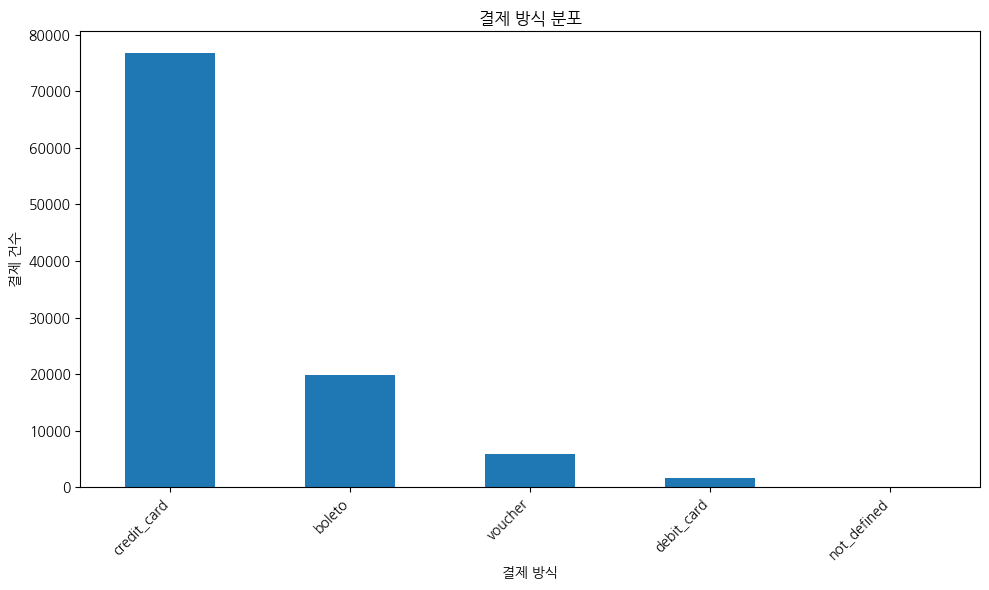

In [ ]:
# 결제 방식 분포
plt.figure(figsize=(10, 6))
order_payments_df['payment_type'].value_counts().plot(kind='bar')
plt.title('결제 방식 분포')
plt.xlabel('결제 방식')
plt.ylabel('결제 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

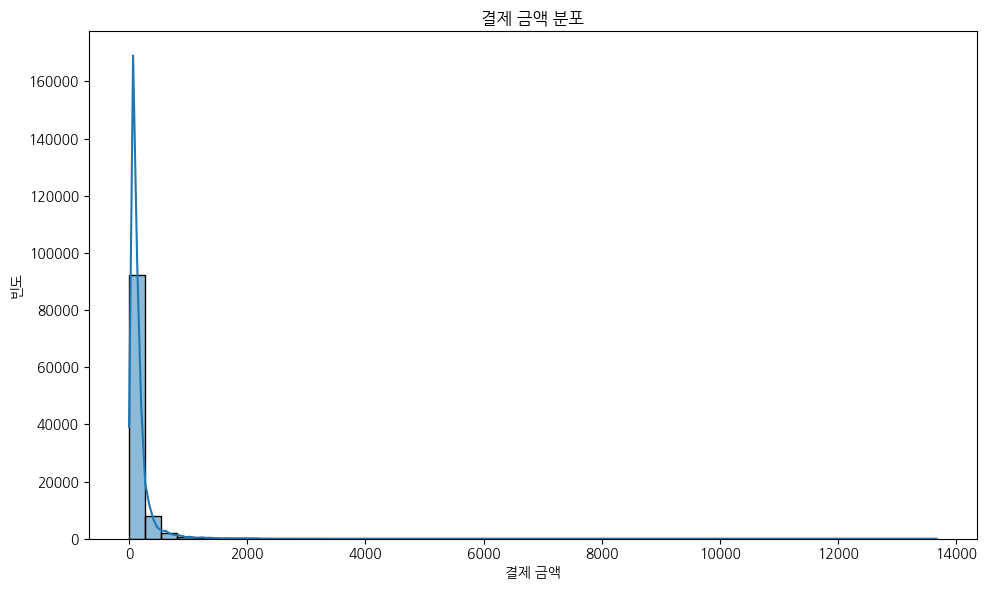


결제 금액 통계:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


In [ ]:
# 결제 금액 분포
plt.figure(figsize=(10, 6))
sns.histplot(order_payments_df['payment_value'], bins=50, kde=True)
plt.title('결제 금액 분포')
plt.xlabel('결제 금액')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()
print("\n결제 금액 통계:")
print(order_payments_df['payment_value'].describe())

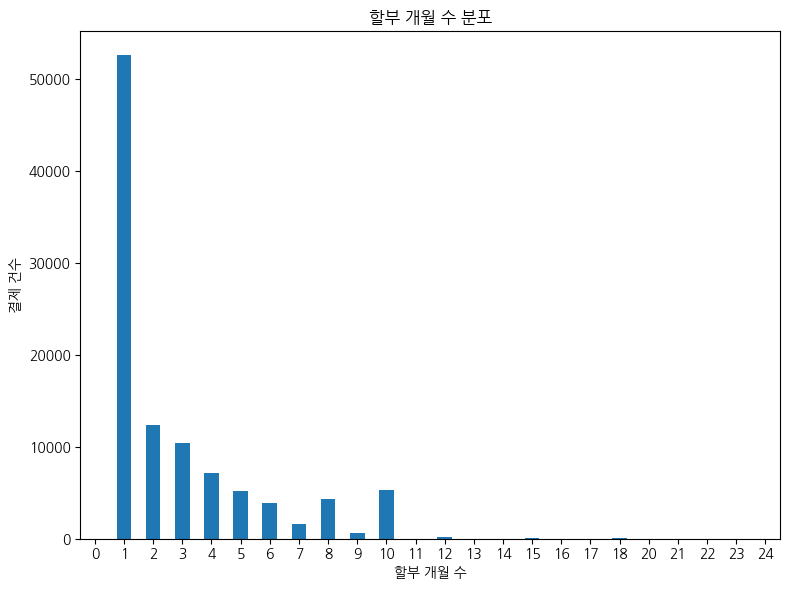

In [ ]:
# 할부 개월 수 분포
plt.figure(figsize=(8, 6))
order_payments_df['payment_installments'].value_counts().sort_index().plot(kind='bar')
plt.title('할부 개월 수 분포')
plt.xlabel('할부 개월 수')
plt.ylabel('결제 건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3-7. Order Reviews 테이블 EDA

In [ ]:
print("\n--- 7. Order Reviews 테이블 EDA ---")
print("\n데이터 정보:")
print(order_reviews_df.info())
print("\n결측치 확인:")
print(order_reviews_df.isnull().sum())


--- 7. Order Reviews 테이블 EDA ---

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

결측치 확인:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


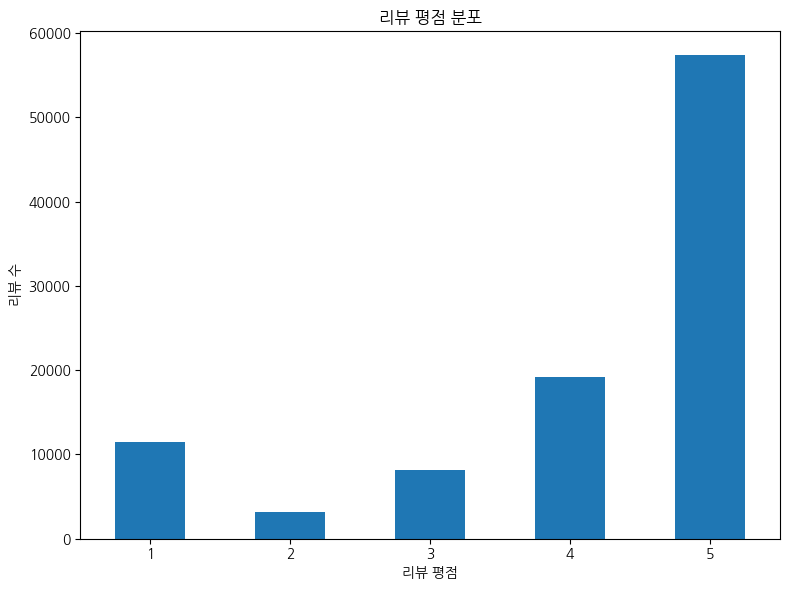

In [ ]:
# 리뷰 평점 분포
plt.figure(figsize=(8, 6))
order_reviews_df['review_score'].value_counts().sort_index().plot(kind='bar')
plt.title('리뷰 평점 분포')
plt.xlabel('리뷰 평점')
plt.ylabel('리뷰 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 리뷰 생성 및 응답 시간 분석
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df['review_response_time'] = (order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date']).dt.days
print("\n리뷰 응답 시간 통계 (일):")
print(order_reviews_df['review_response_time'].describe())


리뷰 응답 시간 통계 (일):
count    99224.000000
mean         2.582248
std          9.890526
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        518.000000
Name: review_response_time, dtype: float64


# 4. AARRR 프레임워크 구성을 위한 지표 아이디어

## 4-1. Acquisition(획득)

- 핵심 질문: 신규 사용자는 어디서, 어떻게 유입되는가?
- 판단 기준: 제시된 지표가 신규 고객의 유입 경로, 규모, 특성 등을 파악하는 데 도움을 주는가?

### 첫 구매 시점(월별)

- 회원가입 시점이 없어 첫 구매 시점을 서비스 유입 시점으로 가정하여 분석 진행
- 이를 통해, 월 별 신규 고객 유입량을 파악하고 그에 따른 인사이트를 도출하기 위해 분석함

In [ ]:
# 주문 데이터에서 고객 고유 ID와 주문 구매 시점 추출 및 정렬
customer_first_order = orders_df[['customer_id', 'order_purchase_timestamp']].sort_values(by='order_purchase_timestamp')

In [ ]:
# 각 고객별 첫 주문 기록만 유지 (중복된 customer_id 중 첫 번째 행)
customer_first_order = customer_first_order.drop_duplicates(subset='customer_id', keep='first')

In [ ]:
# 첫 주문 정보를 고객 데이터프레임에 병합
customers_df = pd.merge(customers_df, customer_first_order, on='customer_id', how='left')

In [ ]:
# 첫 주문 날짜 컬럼을 datetime 타입으로 변환
customers_df['first_purchase_time'] = pd.to_datetime(customers_df['order_purchase_timestamp'])

In [ ]:
# 전체 신규 고객 수 계산 (첫 구매 기록이 있는 고객 수)
new_customer_count = customers_df['first_purchase_time'].notna().sum()
print(f"총 신규 고객 수: {new_customer_count}")

총 신규 고객 수: 99441


In [ ]:
# 첫 구매 시점 (월별) 분석
customers_df['first_purchase_month'] = customers_df['first_purchase_time'].dt.to_period('M')
monthly_new_customers = customers_df['first_purchase_month'].value_counts().sort_index()
print("\n월별 신규 고객 수:")
print(monthly_new_customers)


월별 신규 고객 수:
first_purchase_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: count, dtype: int64


In [ ]:
# 첫 구매 시점 (연도별) 분석
customers_df['first_purchase_year'] = customers_df['first_purchase_time'].dt.to_period('Y')
yearly_new_customers = customers_df['first_purchase_year'].value_counts().sort_index()
print("\n연도별 신규 고객 수:")
print(yearly_new_customers)


연도별 신규 고객 수:
first_purchase_year
2016      329
2017    45101
2018    54011
Freq: Y-DEC, Name: count, dtype: int64


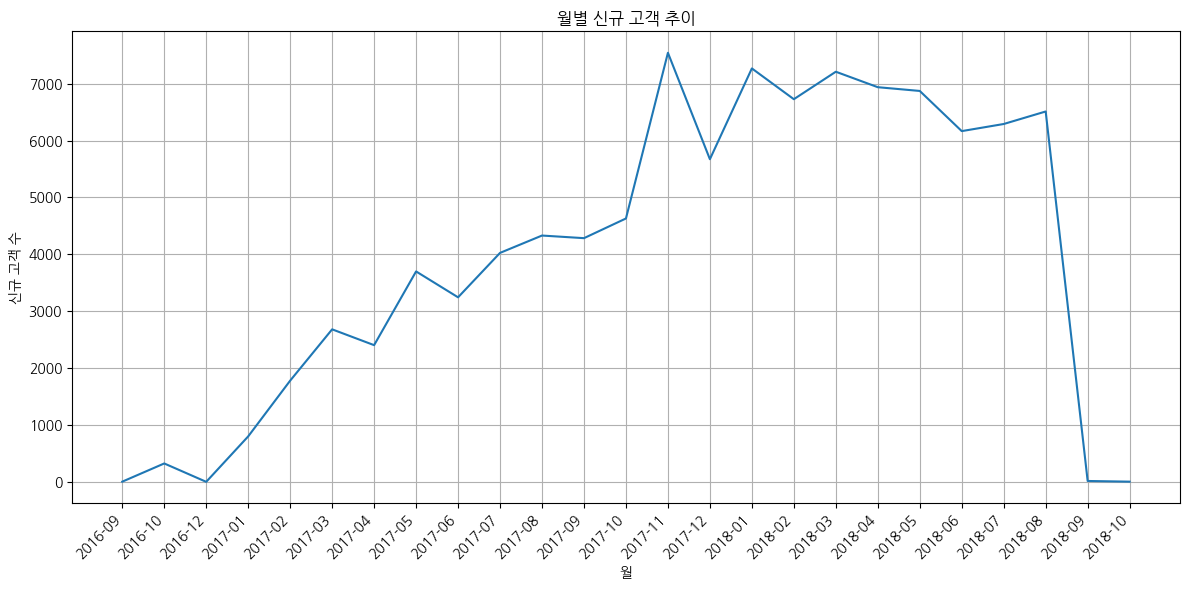

In [ ]:
# 월별 신규 고객 추이 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_new_customers.index.astype(str), y=monthly_new_customers.values)
plt.title('월별 신규 고객 추이')
plt.xlabel('월')
plt.ylabel('신규 고객 수')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 2016년부터 2018년 3월까지 신규 고객 유입이 증가하는 추세를 보임
# 2018년 4월 이후 점차 신규 고객 유입이 감소함
# 2018년 9월 이후 신규 고객 유입의 급감에 대한 원인을 분석할 필요성이 있음

### 고객 지역별 분포

- 광고, 채널 등 외부 유입 경로를 파악할 수 없어 신규 고객 수와 지역별 유입 분석
- 고객이 많이 거주하는 도시의 광고, 배송 속도 등을 파악해 추가 분석을 진행하기 위해 분석 진행

In [ ]:
city_counts = customers_df['customer_city'].value_counts().nlargest(20)
print("\n고객 거주 도시별 고객 수 (상위 20개):")
print(city_counts)


고객 거주 도시별 고객 수 (상위 20개):
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
Name: count, dtype: int64


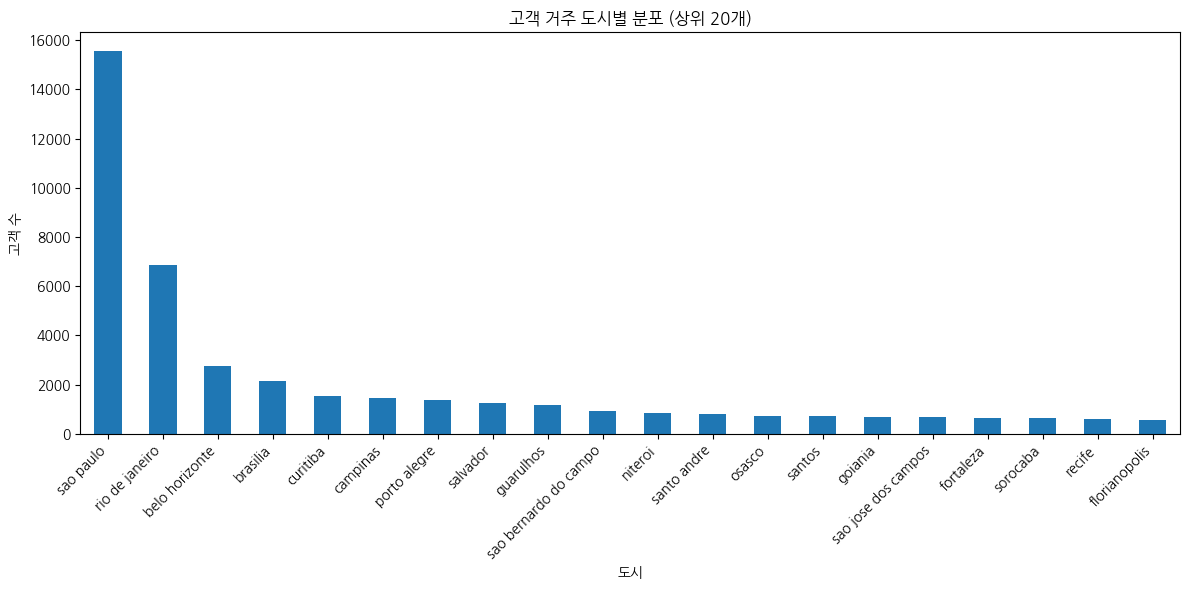

In [ ]:
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.title('고객 거주 도시별 분포 (상위 20개)')
plt.xlabel('도시')
plt.ylabel('고객 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

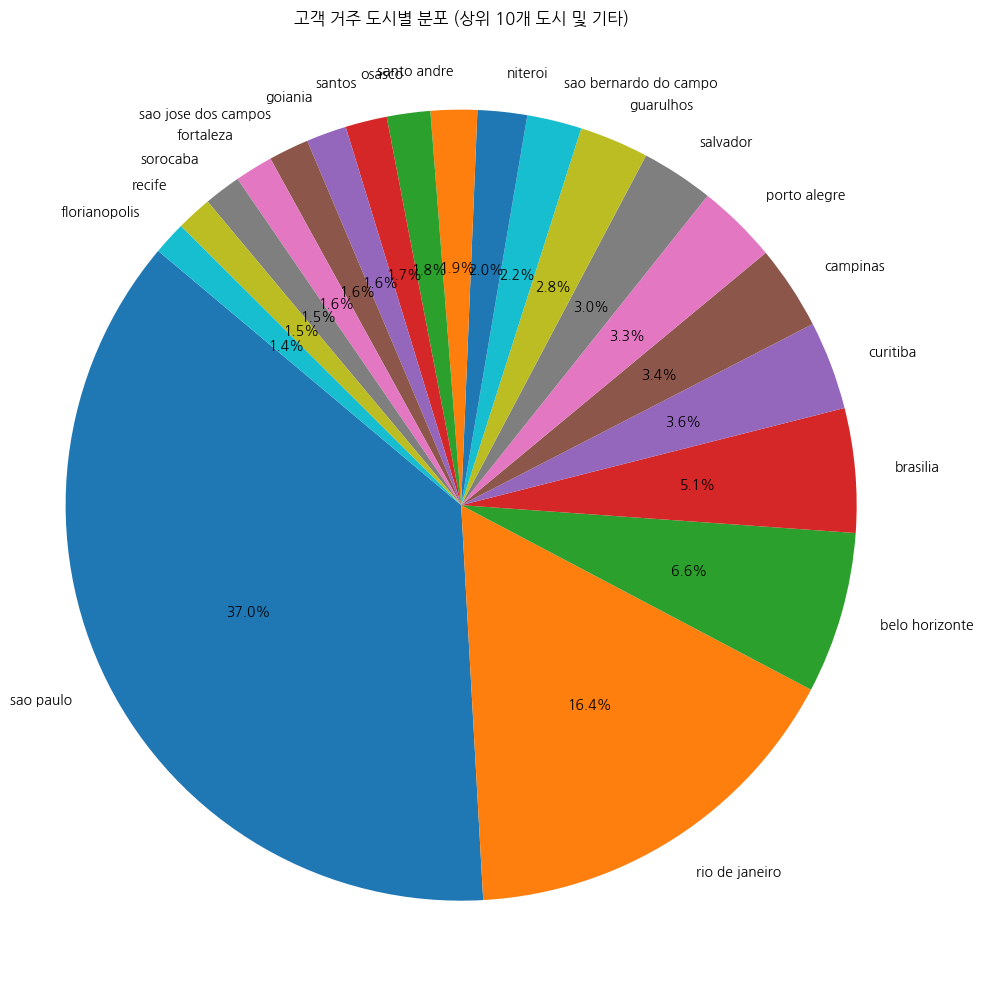

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('고객 거주 도시별 분포 (상위 10개 도시 및 기타)')
plt.axis('equal')  # 원형으로 만들기
plt.tight_layout()
plt.show()

In [ ]:
# 고객 거주 주별 고객 수
state_counts = customers_df['customer_state'].value_counts().sort_index()
print("\n고객 거주 주별 고객 수:")
print(state_counts)


고객 거주 주별 고객 수:
customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
Name: count, dtype: int64


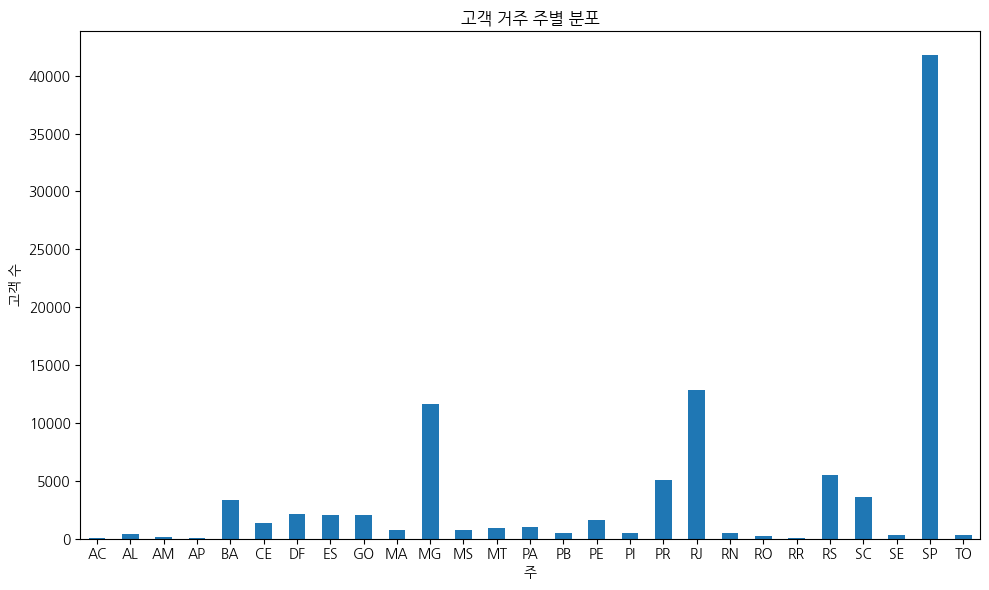

In [ ]:
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.title('고객 거주 주별 분포')
plt.xlabel('주')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 결론\
고객 거주 도시별 분포를 살펴보면, sao paulo, rio de janeiro가 50% 이상 차지하는 것을 알 수 있음.\
고객 거주 주별 분포를 살펴보면, SP, RJ, MG 순으로 고객 수가 많고, 이 3개의 주가 전체의 50% 이상을 차지함.\
(고객)/(도시 인구수) 비율을 파악해 데이터를 구성하는 것이 더욱 정확할 것이라고 파악됨.\
고객 전체의 50% 이상을 차지하는 주, 도시의 광고 방법이나 도시 정보를 파악하여 다른 주, 도시에 적용해볼 수 있음

## 4-2. Activation(활성화)

- 핵심 질문: 처음 유입된 사용자가 우리 서비스의 중요한 기능을 사용하거나 핵심적인 경험을 했는가?
- 판단 기준: 제시된 지표가 신규 사용자의 초기 경험 만족도, 서비스 이용 시작률, 주요 기능 사용 여부 등을 측정하는 데 도움을 주는가?

### 특정 상품 카테고리 구매 고객 비율

- 우리 서비스를 이용하는 목적에 대해 확인하고자 분석
- 특정 카테고리의 상품이 많이 팔린다면, 다른 이커머스와의 차이점을 분석해 우리 서비스의 강점을 키울 수 있을 것이라 기대

In [ ]:
# 전체 고유 고객 수 계산
total_unique_customers = customers_df['customer_unique_id'].nunique()

In [ ]:
# 모든 고유한 상품 카테고리 이름 추출
all_categories = products_df['product_category_name'].unique()

In [ ]:
print(f"전체 고유 고객 수: {total_unique_customers}")

전체 고유 고객 수: 96096


In [ ]:
results_list = []

for category_name in all_categories:
    if pd.isna(category_name):  # NaN 값인 경우 건너뛰기
        continue

    # 주문 아이템 데이터와 상품 데이터 병합
    merged_df = pd.merge(orders_items_df, products_df, on='product_id', how='left')

    # 특정 카테고리 상품을 구매한 주문 아이템 필터링
    category_orders_df = merged_df[merged_df['product_category_name'] == category_name]

    # 해당 주문 아이템과 주문 데이터 병합하여 고객 ID 얻기
    customer_category_orders_df = pd.merge(category_orders_df, orders_df, on='order_id', how='left')

    # 특정 카테고리 구매 고객 식별 (고유한 customer_unique_id 기준)
    category_buyers = pd.merge(customer_category_orders_df, customers_df, on='customer_id', how='left')['customer_unique_id'].unique()
    num_category_buyers = len(category_buyers)

    # 특정 카테고리 구매 고객 비율 계산
    category_buyers_rate = (num_category_buyers / total_unique_customers) * 100

    # 결과를 딕셔너리 형태로 저장
    results_list.append({
        'product_category_name': category_name,
        '구매 고객 수': num_category_buyers,
        '비율': category_buyers_rate
    })

print("모든 카테고리 분석 완료.")

모든 카테고리 분석 완료.


In [ ]:
# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results_list)

In [ ]:
print(f"전체 고유 고객 수: {total_unique_customers}\n")
print("각 상품 카테고리별 구매 고객 비율:")
results_df

전체 고유 고객 수: 96096

각 상품 카테고리별 구매 고객 비율:


,product_category_name,구매 고객 수,비율
0,perfumaria,3124,3.250916
1,artes,202,0.210206
2,esporte_lazer,7515,7.820305
3,bebes,2858,2.974109
4,utilidades_domesticas,5821,6.057484
...,...,...,...
68,casa_conforto_2,23,0.023934
69,portateis_cozinha_e_preparadores_de_alimentos,14,0.014569
70,seguros_e_servicos,2,0.002081
71,moveis_colchao_e_estofado,38,0.039544


In [ ]:
sorted_result_df = pd.merge(category_df, results_df, on='product_category_name', how='left')

In [ ]:
eng_sorted_result_df = sorted_result_df[['product_category_name_english', '구매 고객 수', '비율']].sort_values(by='비율', ascending=False)
eng_sorted_result_df.reset_index(drop=True, inplace=True)
eng_sorted_result_df

,product_category_name_english,구매 고객 수,비율
0,bed_bath_table,9145,9.516525
1,health_beauty,8678,9.030553
2,sports_leisure,7515,7.820305
3,computers_accessories,6557,6.823385
4,furniture_decor,6317,6.573635
...,...,...,...
66,arts_and_craftmanship,21,0.021853
67,la_cuisine,13,0.013528
68,cds_dvds_musicals,12,0.012488
69,fashion_childrens_clothes,8,0.008325


- 결론\
신규 사용자가 이용하는 상품의 카테고리를 파악했음.\
신규 사용자가 이용하는 상품의 카테고리는 bed_bath_table, health_beauty, sports_leisure, computers_accessories ...\
신규 사용자가 많이 이용하는 카테고리는 타 이커머스 대비 가격이 저렴한지 등의 심층 분석을 통해 신규 사용자에 대한 맞춤 서비스를 제공할 수 있을 것.

## 4-3. Retention(유지)

- 핵심 질문: 사용자들이 얼마나 자주, 얼마나 오래 우리 서비스를 다시 이용하는가?
- 판단 기준: 제시된 지표가 기존 사용자의 재방문율, 재구매율, 서비스 이탈률, 고객 생애 가치 등을 파악하는 데 도움을 주는가?

- 데이터 EDA 상 재구매율을 파악하기 어렵다 판단함
- '리뷰 점수가 높을 수록 서비스 만족도가 높지 않을까?' 라는 가설 상정
- 리뷰 점수 변화 추이를 토대로 간접적인 기존 고객 유지 정도를 확인

### 월별 리뷰 점수 변화 추이

In [ ]:
# 리뷰 데이터 날짜 타입 변환
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

In [ ]:
# 리뷰 데이터와 주문 데이터 병합
orders_reviews_df = pd.merge(order_reviews_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

In [ ]:
# 월별 평균 리뷰 점수 계산 (리뷰 생성 날짜 기준)
orders_reviews_df['review_creation_month'] = orders_reviews_df['review_creation_date'].dt.to_period('M')
monthly_avg_review_score_creation = orders_reviews_df.groupby('review_creation_month')['review_score'].mean().sort_index()

In [ ]:
# 월별 평균 리뷰 점수 계산 (주문 구매 시점 기준)
orders_reviews_df['order_purchase_month'] = orders_reviews_df['order_purchase_timestamp'].dt.to_period('M')
monthly_avg_review_score_purchase = orders_reviews_df.groupby('order_purchase_month')['review_score'].mean().sort_index()

In [ ]:
print("\n월별 평균 리뷰 점수 (리뷰 생성 날짜 기준):")
print(monthly_avg_review_score_creation)


월별 평균 리뷰 점수 (리뷰 생성 날짜 기준):
review_creation_month
2016-10    4.055866
2016-11    3.188119
2016-12    2.355556
2017-01    4.338912
2017-02    4.280962
2017-03    4.033051
2017-04    4.036983
2017-05    4.100539
2017-06    4.127616
2017-07    4.183271
2017-08    4.224961
2017-09    4.182424
2017-10    4.182188
2017-11    4.114919
2017-12    3.931596
2018-01    4.063603
2018-02    4.014260
2018-03    3.727413
2018-04    3.919857
2018-05    4.193081
2018-06    4.197171
2018-07    4.288250
2018-08    4.209747
Freq: M, Name: review_score, dtype: float64


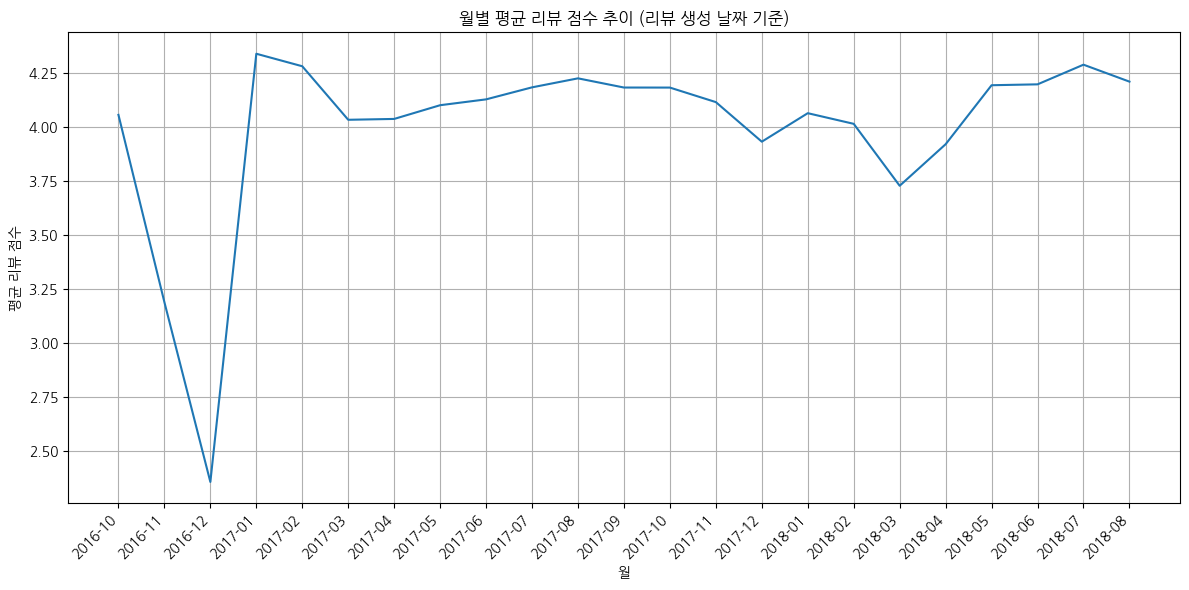

In [ ]:
# 시각화 (리뷰 생성 날짜 기준)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_review_score_creation.index.astype(str), y=monthly_avg_review_score_creation.values)
plt.title('월별 평균 리뷰 점수 추이 (리뷰 생성 날짜 기준)')
plt.xlabel('월')
plt.ylabel('평균 리뷰 점수')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("\n월별 평균 리뷰 점수 (주문 구매 시점 기준):")
print(monthly_avg_review_score_purchase)


월별 평균 리뷰 점수 (주문 구매 시점 기준):
order_purchase_month
2016-09    1.000000
2016-10    3.570093
2016-12    5.000000
2017-01    4.070263
2017-02    4.017455
2017-03    4.072496
2017-04    4.043860
2017-05    4.142587
2017-06    4.147692
2017-07    4.171131
2017-08    4.236121
2017-09    4.188684
2017-10    4.123649
2017-11    3.910937
2017-12    4.020220
2018-01    4.040718
2018-02    3.829091
2018-03    3.752470
2018-04    4.161880
2018-05    4.193779
2018-06    4.278022
2018-07    4.264316
2018-08    4.256359
2018-09    1.800000
2018-10    2.250000
Freq: M, Name: review_score, dtype: float64


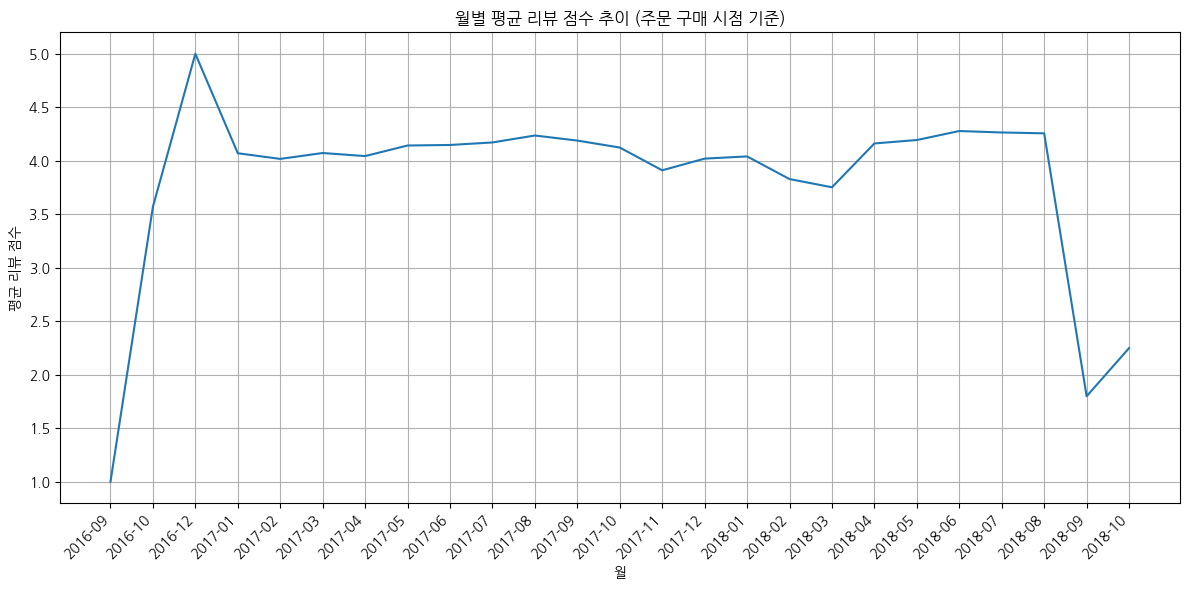

In [ ]:
# 시각화 (주문 구매 시점 기준)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_review_score_purchase.index.astype(str), y=monthly_avg_review_score_purchase.values)
plt.title('월별 평균 리뷰 점수 추이 (주문 구매 시점 기준)')
plt.xlabel('월')
plt.ylabel('평균 리뷰 점수')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 배송 지연과 리뷰 점수 간의 관계

In [ ]:
# 배송 완료되고 예상 배송일이 있는 주문만 필터링하여 NaN 값 제거
delivery_orders_df = orders_df.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])

In [ ]:
# 배송 지연 일수 계산 (실제 배송일 - 예상 배송일)
delivery_orders_df['delivery_delay_days'] = (delivery_orders_df['order_delivered_customer_date'] - delivery_orders_df['order_estimated_delivery_date']).dt.days

In [ ]:
# 주문 데이터와 리뷰 데이터 병합 (dropna 이후의 데이터프레임 사용)
delivery_reviews_df = pd.merge(delivery_orders_df, order_reviews_df, on='order_id', how='inner')

In [ ]:
delivery_reviews_df.sort_values(by='delivery_delay_days', ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,delivery_delay_days,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_response_time
53881,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,2,188,ae83a790a3f01e1c43dd4d2863cebe0c,2,NaN,NaN,2018-03-17,2018-03-17 05:08:11,0
11083,47b40429ed8cce3aee9199792275433f,cb2caaaead400c97350c37a3fc536867,delivered,2018-01-03 09:44:01,2018-01-03 10:31:15,2018-02-06 01:48:28,2018-07-13 20:51:31,2018-01-19,1,175,2a87b7df4f64481f0db340b1196ab9fc,1,NaN,Gostaria de saber o que aconteceu o prazo que ...,2018-01-21,2018-01-24 16:45:40,3
78874,2fe324febf907e3ea3f2aa9650869fa5,65b14237885b3972ebec28c0f7dd2220,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,2017-09-19 17:00:07,2017-04-05,3,167,2f48a889d5738776ab5180f2b4fbb4e5,1,NaN,Porque não me entregaram? Gostaria de saber o ...,2017-04-09,2017-04-09 09:56:36,0
86367,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,3,166,38477ef6c23d3478a0f012503919803a,1,NaN,Comprei um produto nesta loja já fez um mês e ...,2017-04-08,2017-04-08 17:35:19,0
59694,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,3,165,b72948c0912824f5660a661fcb3ef512,1,NaN,"prazo de entrega ultrapassou o previsto, vi pe...",2017-04-13,2017-04-13 12:34:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65393,40dc2ba6f322a17626aac6244332828c,6210a37f9d6a265a4f3fbe2c21672a00,delivered,2017-10-05 21:39:05,2017-10-05 21:49:21,2017-10-09 12:13:58,2017-10-13 13:49:07,2018-01-30,10,-109,d926e41f5d8da4624f4850e60d7fc8fc,5,NaN,NaN,2017-10-14,2017-10-16 20:28:24,2
83765,c2bb89b5c1dd978d507284be78a04cb2,6357fffb5704244d552615bbfcea1442,delivered,2017-05-23 22:28:36,2017-05-24 22:35:08,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,5,-124,6afeab17c60f9f9402bbf93abdce63e3,5,NaN,NaN,2017-06-10,2017-06-12 13:24:30,2
55372,eec7f369423b033e549c02f3c5381205,32cef4bdd6bfa50612d81dc77a93b131,delivered,2018-02-06 20:44:56,2018-02-08 10:10:31,2018-02-15 20:42:12,2018-02-27 16:35:43,2018-07-12,2,-135,308aa99a70d28ba75e803ec8caf49088,3,NaN,Meu produto chegou quebrado não sei como proce...,2018-02-28,2018-03-02 17:28:17,2
15349,c72727d29cde4cf870d569bf65edabfd,964253ff0e4e08180064764a450e521f,delivered,2017-02-07 18:01:15,2017-02-09 02:50:07,2017-02-10 05:32:55,2017-02-14 14:27:45,2017-07-04,2,-140,2e33927523fc955215bff05187cea86b,5,NaN,NaN,2017-02-15,2017-02-16 09:58:46,1


In [ ]:
low_rating_df = delivery_reviews_df[delivery_reviews_df['review_score'] <= 3]

In [ ]:
low_rating_delay_stats = low_rating_df['delivery_delay_days'].describe()

In [ ]:
all_rating_delay_stats = delivery_reviews_df['delivery_delay_days'].describe()

In [ ]:
print("낮은 리뷰 (<= 3점) 주문의 배송 지연 통계:")
print(low_rating_delay_stats)
print("\n전체 리뷰 주문의 배송 지연 통계:")
print(all_rating_delay_stats)

낮은 리뷰 (<= 3점) 주문의 배송 지연 통계:
count    20312.000000
mean        -7.354470
std         13.948155
min       -135.000000
25%        -15.000000
50%         -9.000000
75%         -1.000000
max        188.000000
Name: delivery_delay_days, dtype: float64

전체 리뷰 주문의 배송 지연 통계:
count    96359.000000
mean       -11.917797
std         10.114024
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay_days, dtype: float64


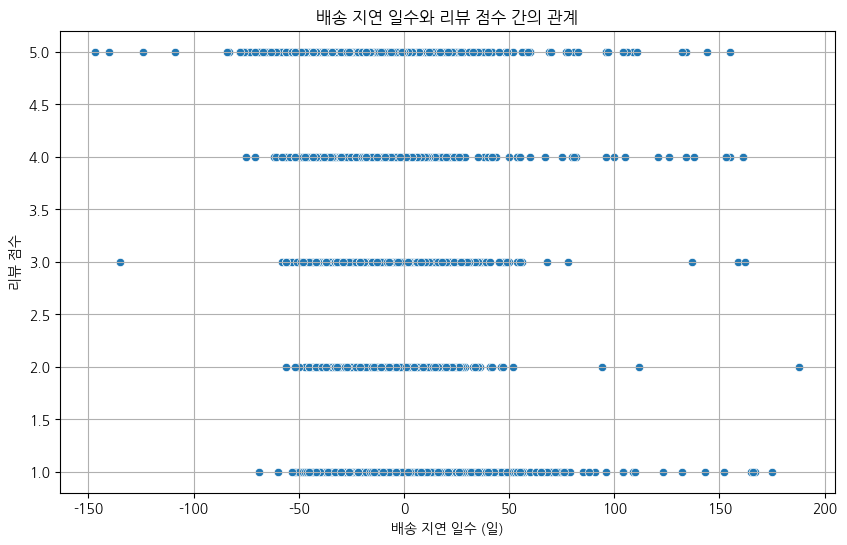

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_delay_days', y='review_score', data=delivery_reviews_df)
plt.title('배송 지연 일수와 리뷰 점수 간의 관계')
plt.xlabel('배송 지연 일수 (일)')
plt.ylabel('리뷰 점수')
plt.grid(True)
plt.show()

In [ ]:
delivery_reviews_df['is_delayed'] = delivery_reviews_df['delivery_delay_days'] > 0
delay_vs_rating = delivery_reviews_df.groupby('is_delayed')['review_score'].mean().reset_index()
delay_vs_rating['is_delayed'] = delay_vs_rating['is_delayed'].map({True: '지연됨', False: '정시 배송'})

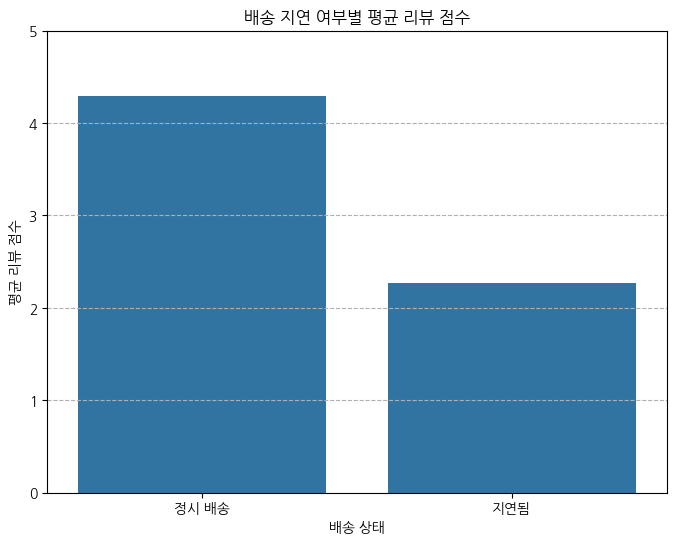

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='is_delayed', y='review_score', data=delay_vs_rating)
plt.title('배송 지연 여부별 평균 리뷰 점수')
plt.xlabel('배송 상태')
plt.ylabel('평균 리뷰 점수')
plt.ylim(0, 5)  # 리뷰 점수 범위 설정
plt.grid(axis='y', linestyle='--')
plt.show()

- 결론\
기존 고객 유지에 대한 데이터를 확인하고 싶으나, 재주문에 대한 정보를 파악할 수 없음.\
월별 리뷰 점수 변화 추이와 신규 고객 유입 데이터를 같이 살펴보며 리뷰 점수와 신규 고객 유입에 대한 관계를 파악해,
기존 고객이 이 서비스를 추천하는지 간접적으로 확인할 수 있음.\
배송 지연 여부별 평균 리뷰 점수를 볼 때, 배송이 지연됨에 따라 리뷰 점수가 크게 달라짐을 확인함.\
서비스를 계속 사용하게 만들기 위해선 배송에 대한 서비스 개선이 필요할 것으로 보임.

## 4-4. Referral(추천)

- 핵심 질문: 사용자들이 자발적으로 다른 사람들에게 우리 서비스를 추천하는가?
- 판단 기준: 제시된 지표가 추천을 통한 신규 사용자 유입, 바이럴 효과, 고객 만족도 등을 측정하거나 간접적으로 추론하는 데 도움을 주는가?

### 고객 만족도에 따른 서비스 추천도

- 고객의 리뷰가 4점 이상이면 서비스를 추천한다는 가설을 세워, 서비스 추천도를 파악하려 함.

In [ ]:
# 리뷰 데이터와 주문 데이터 병합 (고객 ID 포함)
reviewss_df = pd.merge(order_reviews_df, orders_df, on='order_id', how='left')
reviewss_df = pd.merge(reviewss_df, customers_df, on='customer_id', how='left')

In [ ]:
reviewss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      99224 non-null  object        
 1   order_id                       99224 non-null  object        
 2   review_score                   99224 non-null  int64         
 3   review_comment_title           11568 non-null  object        
 4   review_comment_message         40977 non-null  object        
 5   review_creation_date           99224 non-null  datetime64[ns]
 6   review_answer_timestamp        99224 non-null  datetime64[ns]
 7   review_response_time           99224 non-null  int64         
 8   customer_id                    99224 non-null  object        
 9   order_status                   99224 non-null  object        
 10  order_purchase_timestamp_x     99224 non-null  datetime64[ns]
 11  order_approved_

In [ ]:
# 높은 리뷰 점수를 받은 고객 식별 (4점 이상)
satisfied_customers_reviews = reviewss_df[reviewss_df['review_score'] >= 4]
satisfied_customer_ids = satisfied_customers_reviews['customer_unique_id'].unique()
num_satisfied_customers = len(satisfied_customer_ids)
print(f"4점 이상 리뷰를 남긴 고객 수: {num_satisfied_customers}")

4점 이상 리뷰를 남긴 고객 수: 73830


In [ ]:
# 전체 고유 고객 수
total_unique_customers = customers_df['customer_unique_id'].nunique()
print(f"전체 고유 고객 수: {total_unique_customers}")

전체 고유 고객 수: 96096


In [ ]:
# 만족한 고객 비율
satisfied_customer_ratio = (num_satisfied_customers / total_unique_customers) * 100
print(f"전체 고객 중 4점 이상 리뷰를 남긴 고객 비율: {satisfied_customer_ratio:.2f}%")

전체 고객 중 4점 이상 리뷰를 남긴 고객 비율: 76.83%


- 결론\
데이터셋 상에서는 추천 관련 정보가 없어 정확한 분석이 불가능함.\
가설 상 이 서비스에 만족한 고객의 비율이 76.83%라고 한다면,\
기존 고객이 신규 고객에게 서비스를 추천하는 정도는 약 76.83%라고 할 수 있음.\
재구매율과 신규 고객 유입 데이터와 함께 확인한다면 더 정확한 지표가 될 것으로 파악됨.

## 4-5. Revenue(수익)

- 핵심 질문: 사용자들이 우리 서비스에 대해 얼마나 지불하는가?
- 판단 기준: 제시된 지표가 총 수익, 평균 수익, 수익 발생 빈도, 수익 기여도가 높은 요소 등을 파악하는 데 도움을 주는가?

### 총 매출액

In [ ]:
total_revenue_price = orders_items_df['price'].sum()
print(f"상품 가격 기준 총 매출액: {total_revenue_price:.2f}")

상품 가격 기준 총 매출액: 13591643.70


In [ ]:
total_revenue_payment = order_payments_df['payment_value'].sum()
print(f"총 결제 금액: {total_revenue_payment:.2f}")

총 결제 금액: 16008872.12


### 월별 총 수익

In [ ]:
# 주문 데이터와 결제 데이터 병합
merged_df = pd.merge(orders_df, order_payments_df, on='order_id', how='left')

In [ ]:
# 주문 구매 월 정보 추출
merged_df['purchase_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
# 월별 총 수익 계산
monthly_revenue = merged_df.groupby('purchase_month')['payment_value'].sum().sort_index()

In [ ]:
# 결과 출력
print("\n월별 총 수익:")
print(monthly_revenue)


월별 총 수익:
purchase_month
2016-09        252.24
2016-10      59090.48
2016-12         19.62
2017-01     138488.04
2017-02     291908.01
2017-03     449863.60
2017-04     417788.03
2017-05     592918.82
2017-06     511276.38
2017-07     592382.92
2017-08     674396.32
2017-09     727762.45
2017-10     779677.88
2017-11    1194882.80
2017-12     878401.48
2018-01    1115004.18
2018-02     992463.34
2018-03    1159652.12
2018-04    1160785.48
2018-05    1153982.15
2018-06    1023880.50
2018-07    1066540.75
2018-08    1022425.32
2018-09       4439.54
2018-10        589.67
Freq: M, Name: payment_value, dtype: float64


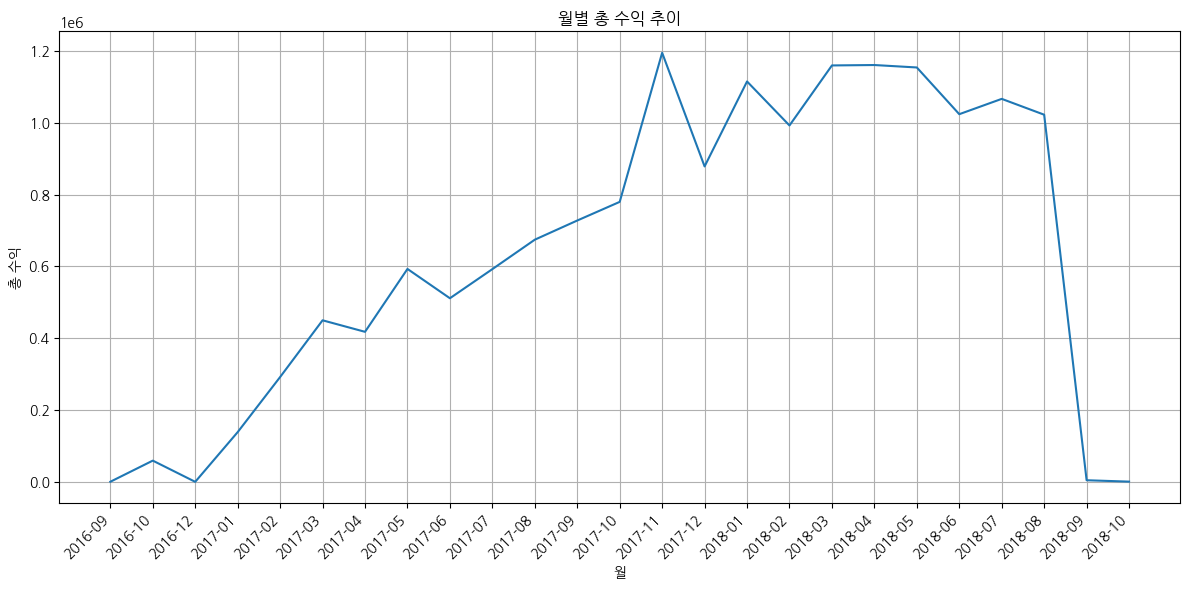

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.title('월별 총 수익 추이')
plt.xlabel('월')
plt.ylabel('총 수익')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상품 카테고리별 매출액

In [ ]:
# 주문 아이템 데이터와 상품 데이터 병합
items_products_df = pd.merge(orders_items_df, products_df, on='product_id', how='left')

In [ ]:
# 상품 카테고리별 매출액 계산
category_revenue = items_products_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

In [ ]:
# 결과 출력
print("\n상품 카테고리별 매출액:")
print(category_revenue)


상품 카테고리별 매출액:
product_category_name
beleza_saude                     1258681.34
relogios_presentes               1205005.68
cama_mesa_banho                  1036988.68
esporte_lazer                     988048.97
informatica_acessorios            911954.32
                                    ...    
flores                              1110.04
casa_conforto_2                      760.27
cds_dvds_musicais                    730.00
fashion_roupa_infanto_juvenil        569.85
seguros_e_servicos                   283.29
Name: price, Length: 73, dtype: float64


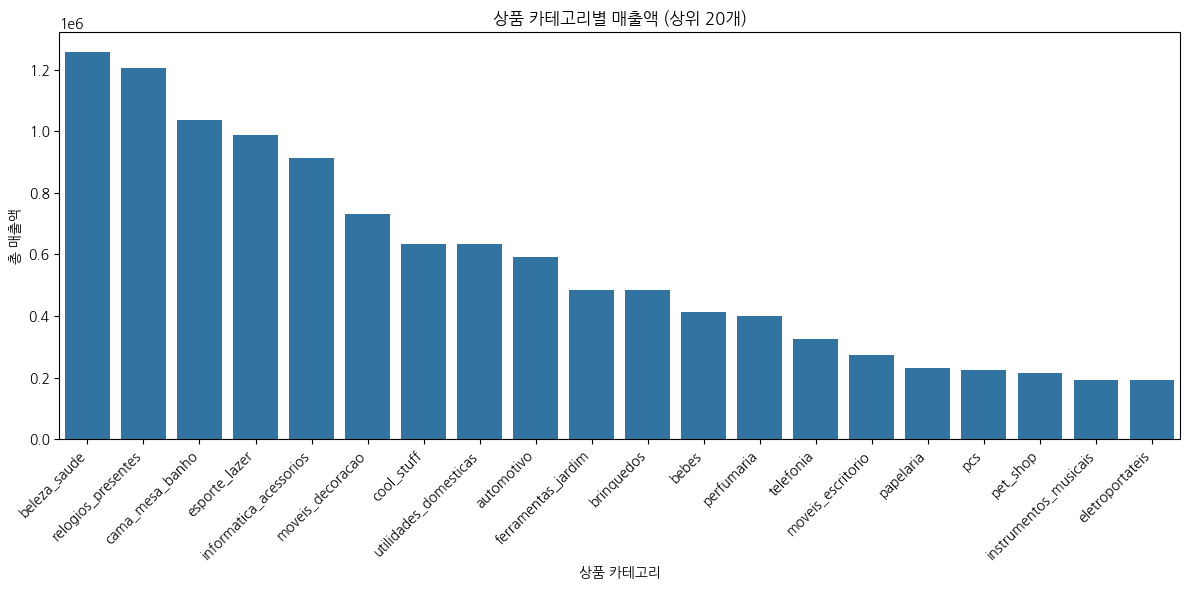

In [ ]:
# 상품 카테고리별 매출액 시각화 (상위 20위)
top_category_revenue = category_revenue.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_category_revenue.index, y=top_category_revenue.values)
plt.title(f'상품 카테고리별 매출액 (상위 {20}개)')
plt.xlabel('상품 카테고리')
plt.ylabel('총 매출액')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### ARPU (Average Revenue Per User)

- 활성 사용자 한 명당 얼마나 많은 수익을 창출하는지 파악

In [ ]:
# 총 수익 계산
total_revenue = order_payments_df['payment_value'].sum()
print(f"총 수익: {total_revenue:.2f}")

총 수익: 16008872.12


In [ ]:
# 총 활성 사용자 수 계산
total_active_users = customers_df['customer_unique_id'].nunique()
print(f"총 활성 사용자 수: {total_active_users}")

총 활성 사용자 수: 96096


In [ ]:
# 전체 기간 ARPU 계산
overall_arpu = total_revenue / total_active_users
print(f"전체 기간 ARPU: {overall_arpu:.2f}")

전체 기간 ARPU: 166.59


In [ ]:
# 월별 분석을 위해 주문 데이터와 결제 데이터 병합
paymentss_df = pd.merge(orders_df, order_payments_df, on='order_id', how='left')

In [ ]:
# 주문 구매 월 정보 추출
paymentss_df['purchase_month'] = paymentss_df['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
# 월별 총 수익 계산
monthly_revenue = paymentss_df.groupby('purchase_month')['payment_value'].sum()

In [ ]:
# 월별 활성 사용자 수 계산
monthly_active_users = paymentss_df.groupby('purchase_month')['customer_id'].nunique()
monthly_active_users

,customer_id
purchase_month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


In [ ]:
# 월별 ARPU 계산
monthly_arpu = monthly_revenue / monthly_active_users
monthly_arpu

,0
purchase_month,
2016-09,63.060000
2016-10,182.378025
2016-12,19.620000
2017-01,173.110050
2017-02,163.993264
2017-03,167.734377
2017-04,173.788698
2017-05,160.248330
2017-06,157.558206


In [ ]:
# 결과 출력
print("월별 ARPU:")
print(monthly_arpu)

월별 ARPU:
purchase_month
2016-09     63.060000
2016-10    182.378025
2016-12     19.620000
2017-01    173.110050
2017-02    163.993264
2017-03    167.734377
2017-04    173.788698
2017-05    160.248330
2017-06    157.558206
2017-07    147.139324
2017-08    155.713766
2017-09    169.839545
2017-10    168.360587
2017-11    158.388494
2017-12    154.838971
2018-01    153.391688
2018-02    147.512387
2018-03    160.817102
2018-04    167.284260
2018-05    167.900793
2018-06    166.025701
2018-07    169.507430
2018-08    157.006345
2018-09    277.471250
2018-10    147.417500
Freq: M, dtype: float64


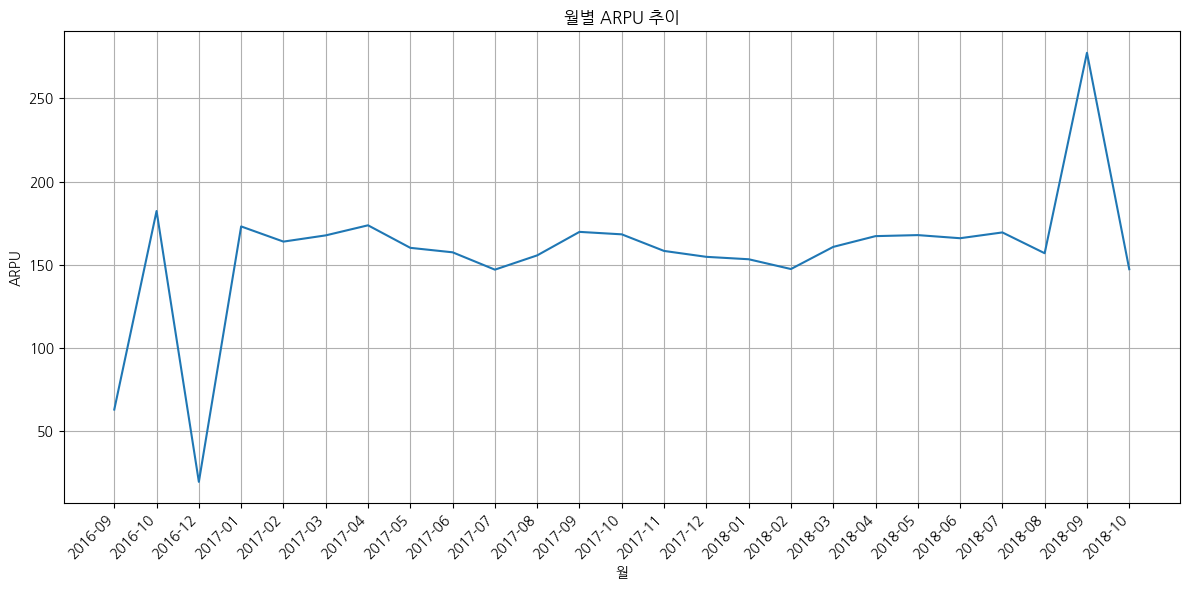

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_arpu.index.astype(str), y=monthly_arpu.values)
plt.title('월별 ARPU 추이')
plt.xlabel('월')
plt.ylabel('ARPU')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### AOV (Average Order Value)

- 한 번의 주문 시 고객이 평균적으로 얼마나 많은 금액을 지출하는지 분석

In [ ]:
# 총 수익 계산
total_revenue = order_payments_df['payment_value'].sum()
print(f"총 수익: {total_revenue:.2f}")

총 수익: 16008872.12


In [ ]:
# 총 주문 수 계산
total_orders = orders_df['order_id'].nunique()
print(f"총 주문 수: {total_orders}")

총 주문 수: 99441


In [ ]:
# 전체 기간 AOV 계산
overall_aov = total_revenue / total_orders
print(f"전체 기간 AOV: {overall_aov:.2f}")

전체 기간 AOV: 160.99


In [ ]:
# 월별 분석을 위해 주문 데이터와 결제 데이터 병합
orders_payments_df = pd.merge(orders_df, order_payments_df, on='order_id', how='left')

In [ ]:
# 주문 구매 월 정보 추출
orders_payments_df['purchase_month'] = orders_payments_df['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
# 월별 총 수익 계산
monthly_revenue = orders_payments_df.groupby('purchase_month')['payment_value'].sum()

In [ ]:
# 월별 총 주문 수 계산
monthly_orders = orders_payments_df.groupby('purchase_month')['order_id'].nunique()

In [ ]:
# 월별 AOV 계산
monthly_aov = monthly_revenue / monthly_orders

In [ ]:
# 결과 출력
print("\n월별 AOV:")
print(monthly_aov)


월별 AOV:
purchase_month
2016-09     63.060000
2016-10    182.378025
2016-12     19.620000
2017-01    173.110050
2017-02    163.993264
2017-03    167.734377
2017-04    173.788698
2017-05    160.248330
2017-06    157.558206
2017-07    147.139324
2017-08    155.713766
2017-09    169.839545
2017-10    168.360587
2017-11    158.388494
2017-12    154.838971
2018-01    153.391688
2018-02    147.512387
2018-03    160.817102
2018-04    167.284260
2018-05    167.900793
2018-06    166.025701
2018-07    169.507430
2018-08    157.006345
2018-09    277.471250
2018-10    147.417500
Freq: M, dtype: float64


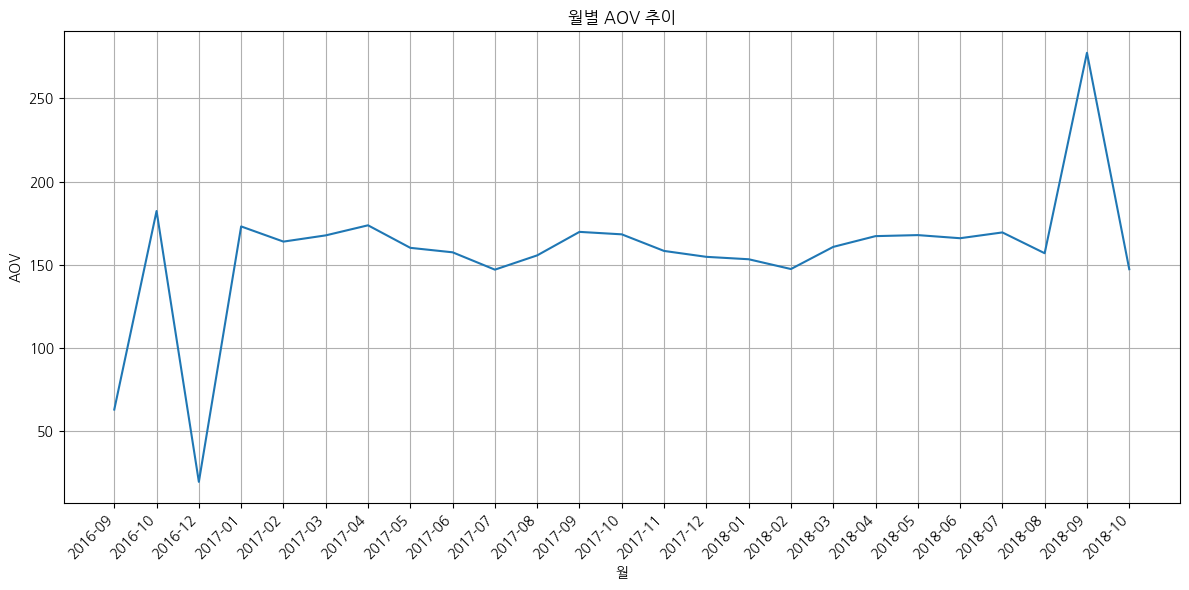

In [ ]:
# 월별 AOV 추이 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_aov.index.astype(str), y=monthly_aov.values)
plt.title('월별 AOV 추이')
plt.xlabel('월')
plt.ylabel('AOV')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

- 결론\
월별 총 수익이 점차 증가하다 2018-09 부터 급감함. 그에 대한 원인 분석이 필요함.\
주문 데이터셋에 첫 주문에 대한 데이터만 포함되어 있기 때문에, ARPU와 AOV간의 차이가 없음.\
2016-12 > ARPU, AOV 지표의 급감 / 2018-09 > ARPU, AOV 지표의 급증 이 지표들에 대한 추가 분석이 필요함.

# Olist 이커머스 플랫폼 AARRR 분석 최종 결론

## 단계별 핵심 결과

1. 획득 (Acquisition): 상파울루, 리우데자네이루 등 주요 도시/주에서 50% 이상의 고객을 확보하며 강력한 지역 기반을 증명했습니다. 2018년 8월까지 꾸준한 신규 고객 증가 추세를 보였으나, 이후 급격히 감소했습니다.

2. 활성화 (Activation): bed_bath_table, health_beauty, sports_leisure 등의 카테고리가 신규 고객의 첫 구매를 효과적으로 유도하고 있음을 확인했습니다.

3. 유지 (Retention): 배송 지연이 길어질수록 고객 리뷰 점수가 현저히 낮아지는 명확한 상관관계를 확인했습니다. 이는 고객 이탈의 주요 원인일 가능성이 매우 높으며, 고객 유지를 위해 배송 시스템 개선이 최우선 과제임을 시사합니다. (참고: customer_unique_id 기반의 재구매율, 코호트 분석 등 직접적인 유지 지표 분석 보강 필요)

4. 추천 (Referral): 긍정적 리뷰(4점 이상) 비율(약 76.8%)은 서비스 만족 시 추천 잠재력이 있음을 보여주나, 직접적인 추천 데이터는 없습니다. 현재의 배송 문제가 이 잠재력을 크게 저해하고 있을 것으로 판단됩니다.

5. 수익 (Revenue): 2018년 8월까지 월별 매출이 성장세를 보였으나, 2018년 9월 이후 매출이 급감하는 심각한 문제가 발생했습니다. beleza_saude(health_beauty), relogios_presentes(watches_gifts) 등 특정 카테고리가 매출에 크게 기여하고 있습니다. ARPU 분석 결과, 2018년 9월에 비정상적인 급증이 관찰되어 데이터 또는 특이 상황에 대한 검토가 필요합니다.

## 종합 요약

- Olist 이커머스 플랫폼은 특정 핵심 지역(상파울루, 리우데자네이루 등) 중심의 성공적인 초기 고객 확보 능력과 특정 카테고리(bed_bath_table, health_beauty 등)에서의 신규 고객 유인을 보여주었습니다.
- 그러나 만성적인 배송 지연 문제가 고객 만족도(리뷰 점수 하락으로 증명됨)를 낮추는 요인이 되고, 이는 고객 유지 및 추천 활동의 가장 큰 장애물로 작용할 가능성이 높습니다.
- 또한, 2018년 9월 이후 나타난 급격한 매출 및 신규 고객 유입 감소는 비즈니스의 지속 가능성에 대한 심각한 문제이기에, 이에 대한 원인 규명과 해결이 시급합니다.

## 핵심 문제점 및 전략 제언

1. 최우선 과제: 배송 시스템 혁신: 고객 만족도 회복 및 유지율/추천율 개선을 위해 배송 지연 문제 해결에 모든 역량을 집중해야 합니다.

2. 긴급 과제: 2018년 9월 이후 성장 급락 원인 규명: 매출 및 신규 고객 급감의 근본 원인(시장 환경 변화, 내부 정책 변경, 데이터 문제 등)을 신속히 파악하고 대응 전략을 수립해야 합니다.

3. 데이터 기반 의사결정 강화:

    - customer_unique_id를 활용하여 재구매율, 고객 생애 가치(CLTV), 코호트 분석 등 핵심 유지/수익 지표를 정확하게 측정하고 관리해야 합니다.

    - ARPU, AOV 등 주요 수익 지표를 정기적으로 모니터링하고 변동성의 원인을 분석해야 합니다.

4. 지속 성장 동력 확보:

    - 강점 지역(SP, RJ, MG) 및 인기 카테고리의 성공 요인을 분석하여 다른 지역/카테고리로 확장 적용하는 전략을 검토합니다.

    - 신규 고객 유입을 위한 마케팅 활동과 더불어, 기존 고객 유지 및 만족도 제고에 자원을 배분해야 합니다.


결론적으로, Olist는 명확한 초기 성장 가능성을 보여주었으나, 핵심 운영 문제인 '배송'과 설명되지 않는 '매출 급락'이라는 심각한 과제에 직면해 있습니다. 데이터에 기반한 문제 해결과 운영 효율성 개선이 이루어진다면 다시 건강한 성장 궤도로 복귀할 수 있을 것입니다.

# 세그먼트 분석

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
# 1. Customers와 Orders 병합 (customer_id 기준)
# customer_unique_id를 기준으로 병합하는 것이 최종 목표이므로, 먼저 customer_id를 통해 연결

df_merged = pd.merge(customers_df, orders_df, on='customer_id', how='left')

# 2. Order Payments 병합 (order_id 기준)
df_merged = pd.merge(df_merged, order_payments_df, on='order_id', how='left')

# 3. Order Items 병합 (order_id 기준)
df_merged = pd.merge(df_merged, orders_items_df, on='order_id', how='left')

# 4. Products 병합 (product_id 기준)
df_merged = pd.merge(df_merged, products_df, on='product_id', how='left')

# 5. Order Reviews 병합 (order_id 기준)
df_merged = pd.merge(df_merged, order_reviews_df, on='order_id', how='left')

In [ ]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [ ]:
# 특정 컬럼 기준 중복 개수 확인
duplicate_userid_count = df_merged.duplicated(subset=['order_id']).sum()
print(f"order_id 기준 중복 행 개수: {duplicate_userid_count}")

# 중복된 user_id 값 확인
duplicate_userids = df_merged[df_merged.duplicated(subset=['order_id'], keep=False)]['order_id'].unique()
print("중복된 order_id 목록:")
print(duplicate_userids)

order_id 기준 중복 행 개수: 19702
중복된 order_id 목록:
['17825f24877a9289214c301ae0c9424b' 'aaff8afa47c8426e414a6d908a97713c'
 '77b062be7c5bd21712905feb8e1cfeed' ... 'e86b1b2dd48839d7351406434afb578d'
 '51c6d2f460589fa7b65f2da51e860206' 'ec3a75fb0ac595e461765d2d854b1d08']


In [ ]:
df_merged = df_merged.drop_duplicates(subset=['order_id'], keep='first')
df_merged = df_merged.reset_index(drop=True)
print(f"중복 제거 후 행 개수: {len(df_merged)}")

중복 제거 후 행 개수: 99441


In [ ]:
# 특정 컬럼 기준 중복 개수 확인
duplicate_userid_count = df_merged.duplicated(subset=['customer_id']).sum()
print(f"customer_id 기준 중복 행 개수: {duplicate_userid_count}")

# 중복된 customer_id 값 확인
duplicate_userids = df_merged[df_merged.duplicated(subset=['customer_id'], keep=False)]['customer_id'].unique()
print("중복된 customer_id 목록:")
print(duplicate_userids)

customer_id 기준 중복 행 개수: 0
중복된 customer_id 목록:
[]


In [ ]:
# 고객별 특성 생성 (customer_unique_id 기준)
customer_features = df_merged.groupby('customer_unique_id').agg(
    # 기본 정보
    customer_state=('customer_state', lambda x: x.iloc[0]),  # 첫 번째 값 사용
    customer_city=('customer_city', lambda x: x.iloc[0]),    # 첫 번째 값 사용

    # 주문 행동
    total_orders=('order_id', 'nunique'),                    # 고유 주문 수
    total_items=('order_item_id', 'count'),                  # 총 구매 상품 수
    total_spent=('payment_value', 'sum'),                    # 총 결제 금액
    avg_payment_value=('payment_value', 'mean'),             # 평균 결제 금액
    avg_installments=('payment_installments', 'mean'),       # 평균 할부 개월 수

    # 시간 관련 특성
    last_purchase_date=('order_purchase_timestamp', 'max'),  # 마지막 구매일
    first_purchase_date=('order_purchase_timestamp', 'min'), # 첫 구매일

    # 배송 관련
    avg_delivery_days=('order_delivered_customer_date', lambda x:
                      (x - df_merged.loc[x.index, 'order_purchase_timestamp']).dt.days.mean()),  # 평균 배송 소요일

    # 상품 선호도
    unique_product_categories=('product_category_name', 'nunique'),  # 구매한 고유 카테고리 수
    most_purchased_category=('product_category_name', lambda x: x.value_counts().index[0]
                           if len(x.value_counts()) > 0 else None),  # 가장 많이 구매한 카테고리
    avg_product_weight=('product_weight_g', 'mean'),         # 평균 상품 무게
    avg_product_photos=('product_photos_qty', 'mean'),       # 평균 상품 사진 수

    # 리뷰 관련
    avg_review_score=('review_score', 'mean'),               # 평균 리뷰 점수
    num_reviews=('review_id', 'nunique'),                    # 작성한 리뷰 수
    has_negative_review=('review_score', lambda x: (x <= 3).any())  # 부정적 리뷰 여부
).reset_index()

In [ ]:
# 시간 관련 추가 특성 계산
current_date = df_merged['order_purchase_timestamp'].max()
customer_features['purchase_recency'] = (current_date - customer_features['last_purchase_date']).dt.days
customer_features['customer_tenure_days'] = (customer_features['last_purchase_date'] -
                                           customer_features['first_purchase_date']).dt.days + 1

# 구매 빈도 계산 (주문 수 / 고객 활동 기간)
customer_features['purchase_frequency'] = customer_features['total_orders'] / customer_features['customer_tenure_days']
customer_features['purchase_frequency'] = customer_features['purchase_frequency'].fillna(0)

# 결제 여부 특성 (타겟 변수)
customer_features['is_payment'] = customer_features['total_spent'] > 0

# 불필요한 날짜 컬럼 제거
customer_features = customer_features.drop(columns=['last_purchase_date', 'first_purchase_date'])

In [ ]:
print("\n고객별 특성 데이터프레임 정보:")
print(customer_features.info())
print(customer_features.head())


고객별 특성 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         96096 non-null  object 
 1   customer_state             96096 non-null  object 
 2   customer_city              96096 non-null  object 
 3   total_orders               96096 non-null  int64  
 4   total_items                96096 non-null  int64  
 5   total_spent                96096 non-null  float64
 6   avg_payment_value          96095 non-null  float64
 7   avg_installments           96095 non-null  float64
 8   avg_delivery_days          93356 non-null  float64
 9   unique_product_categories  96096 non-null  int64  
 10  most_purchased_category    94083 non-null  object 
 11  avg_product_weight         95407 non-null  float64
 12  avg_product_photos         94083 non-null  float64
 13  avg_review_score           

In [ ]:
# 수치형 결측치 처리: 0으로 대체 (해당 고객이 관련 활동이 없었음을 의미한다고 가정)
# 예: 구매 이력이 없거나, 리뷰를 남기지 않은 경우
numerical_cols_to_fill_zero = [
    'total_spent', 'avg_payment_value', 'avg_installments',
    'avg_delivery_days', 'avg_product_weight', 'avg_product_photos',
    'avg_review_score', 'num_reviews'
]
for col in numerical_cols_to_fill_zero:
    if col in customer_features.columns:
        customer_features[col] = customer_features[col].fillna(0)

In [ ]:
# 범주형 결측치 처리: 'most_purchased_category'는 'No Category'로 대체
if 'most_purchased_category' in customer_features.columns:
    customer_features['most_purchased_category'] = customer_features['most_purchased_category'].fillna('No Category')

# 'customer_state'와 'customer_city'는 고객의 기본 정보이므로, 결측치가 있다면 제거하거나 최빈값으로 대체할 수 있습니다.
# 여기서는 최빈값으로 대체하는 예시를 보여드립니다.
if 'customer_state' in customer_features.columns:
    customer_features['customer_state'] = customer_features['customer_state'].fillna(customer_features['customer_state'].mode()[0])
if 'customer_city' in customer_features.columns:
    customer_features['customer_city'] = customer_features['customer_city'].fillna(customer_features['customer_city'].mode()[0])


In [ ]:
print(customer_features.isnull().sum())

customer_unique_id           0
customer_state               0
customer_city                0
total_orders                 0
total_items                  0
total_spent                  0
avg_payment_value            0
avg_installments             0
avg_delivery_days            0
unique_product_categories    0
most_purchased_category      0
avg_product_weight           0
avg_product_photos           0
avg_review_score             0
num_reviews                  0
has_negative_review          0
purchase_recency             0
customer_tenure_days         0
purchase_frequency           0
is_payment                   0
dtype: int64


In [ ]:
# 1. 데이터 타입 확인
print("--- 데이터 타입 확인 ---")
print(customer_features.info())
print("\n")

# 2. 데이터 타입 변환
# 'has_negative_review'와 'is_payment'를 불리언에서 정수형(0 또는 1)으로 변환
if 'has_negative_review' in customer_features.columns:
    customer_features['has_negative_review'] = customer_features['has_negative_review'].astype(int)
if 'is_payment' in customer_features.columns:
    customer_features['is_payment'] = customer_features['is_payment'].astype(int)

# 범주형 컬럼을 'category' 타입으로 변환 (메모리 효율성 및 일부 라이브러리 호환성)
categorical_cols = ['customer_state', 'customer_city', 'most_purchased_category']
for col in categorical_cols:
    if col in customer_features.columns:
        customer_features[col] = customer_features[col].astype('category')

print("--- 데이터 타입 변환 후 확인 ---")
print(customer_features.info())
print("\n")

--- 데이터 타입 확인 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         96096 non-null  object 
 1   customer_state             96096 non-null  object 
 2   customer_city              96096 non-null  object 
 3   total_orders               96096 non-null  int64  
 4   total_items                96096 non-null  int64  
 5   total_spent                96096 non-null  float64
 6   avg_payment_value          96096 non-null  float64
 7   avg_installments           96096 non-null  float64
 8   avg_delivery_days          96096 non-null  float64
 9   unique_product_categories  96096 non-null  int64  
 10  most_purchased_category    96096 non-null  object 
 11  avg_product_weight         96096 non-null  float64
 12  avg_product_photos         96096 non-null  float64
 13  avg_review_score           9

--- 수치형 컬럼의 기술 통계량 (이상치 징후 확인) ---
       total_orders   total_items   total_spent  avg_payment_value  \
count  96096.000000  96096.000000  96096.000000       96096.000000   
mean       1.034809      1.026744    163.844600         158.743964   
std        0.214384      0.227540    228.965643         219.819325   
min        1.000000      0.000000      0.000000           0.000000   
25%        1.000000      1.000000     61.520000          60.680000   
50%        1.000000      1.000000    106.310000         103.802500   
75%        1.000000      1.000000    180.992500         175.312500   
max       17.000000     16.000000  13664.080000       13664.080000   

       avg_installments  avg_delivery_days  unique_product_categories  \
count      96096.000000       96096.000000               96096.000000   
mean           2.902862          11.758220                   0.996139   
std            2.687119           9.627735                   0.200980   
min            0.000000           0.000000

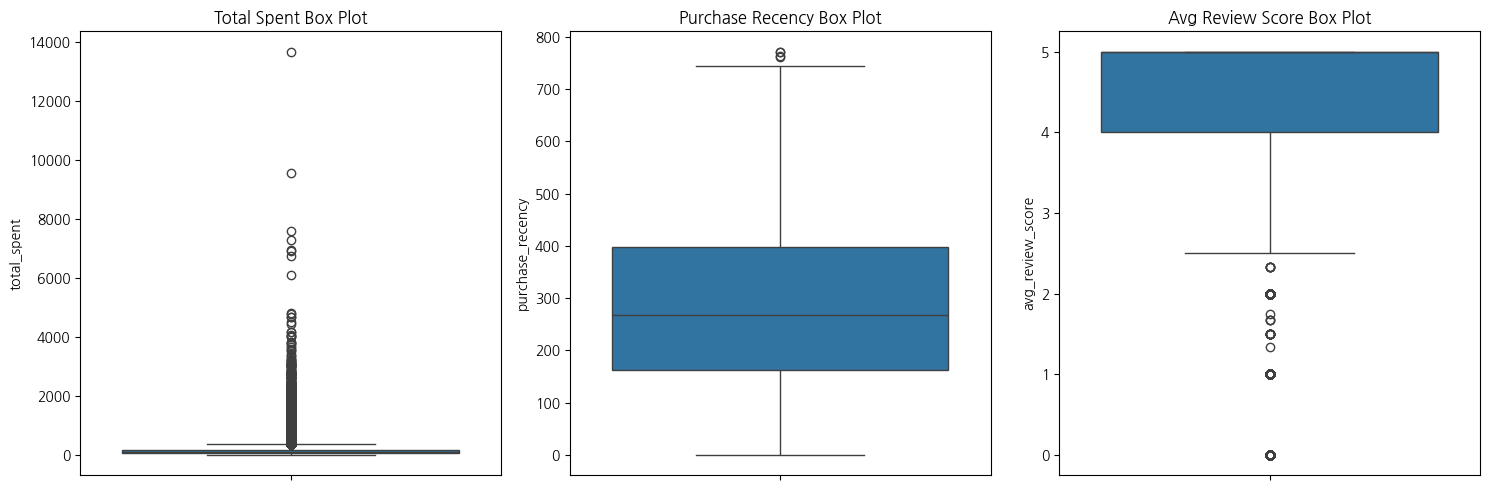

In [ ]:
# 수치형 컬럼 리스트 (customer_unique_id, customer_state, customer_city, most_purchased_category, is_payment 제외)
numerical_features = customer_features.select_dtypes(include=np.number).columns.tolist()
# 불리언을 int로 바꾼 is_payment는 제외
if 'is_payment' in numerical_features:
    numerical_features.remove('is_payment')
if 'has_negative_review' in numerical_features:
    numerical_features.remove('has_negative_review')

print("--- 수치형 컬럼의 기술 통계량 (이상치 징후 확인) ---")
print(customer_features[numerical_features].describe())

# 박스 플롯으로 시각화하여 이상치 확인 (몇 개의 주요 컬럼만 예시)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=customer_features['total_spent'])
plt.title('Total Spent Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=customer_features['purchase_recency'])
plt.title('Purchase Recency Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=customer_features['avg_review_score'])
plt.title('Avg Review Score Box Plot')
plt.tight_layout()
plt.show()

In [ ]:
# 필요하다면 이상치 처리 코드 추가 (예: total_spent의 상위 1%를 캡핑)
Q1 = customer_features['total_spent'].quantile(0.25)
Q3 = customer_features['total_spent'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
customer_features['total_spent'] = np.where(customer_features['total_spent'] > upper_bound, upper_bound, customer_features['total_spent'])

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# 1. 클러스터링에 사용할 특성 선택
# 범주형 특성과 수치형 특성 분리
categorical_features = ['customer_state', 'customer_city', 'most_purchased_category']
# customer_unique_id와 is_payment(타겟 변수)는 제외
numerical_features = [col for col in customer_features.columns
                     if col not in categorical_features + ['customer_unique_id', 'is_payment']]

In [ ]:
# 2. 전처리 파이프라인 구성
# 수치형 특성: 표준화 (StandardScaler)
# 범주형 특성: 원-핫 인코딩 (OneHotEncoder)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 전처리 적용
X = preprocessor.fit_transform(customer_features)

print(f"전처리 후 데이터 형태: {X.shape}")

전처리 후 데이터 형태: (96096, 4234)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

PCA 후 차원 수: 10


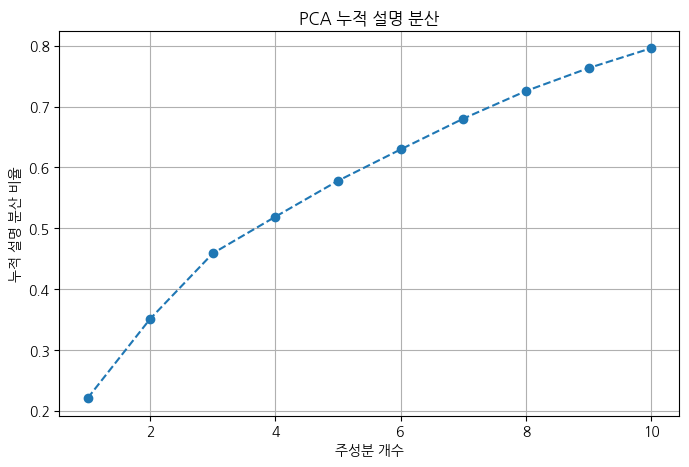

In [ ]:
# 1) 특성 분리
categorical_features = ['customer_state', 'customer_city', 'most_purchased_category']
numerical_features = [col for col in customer_features.columns
                     if col not in categorical_features + ['customer_unique_id', 'is_payment']]

# 2) 전처리 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 3) 전처리 및 차원 축소
X_processed = preprocessor.fit_transform(customer_features)

# PCA 적용 (주성분 개수는 데이터 설명력에 따라 조절 가능)
pca = PCA(n_components=10)  # 95% 분산 설명하는 주성분 개수 선택
X_pca = pca.fit_transform(X_processed)

print(f"PCA 후 차원 수: {X_pca.shape[1]}")

# 4) 누적 설명 분산 시각화
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산 비율')
plt.title('PCA 누적 설명 분산')
plt.grid(True)
plt.show()

In [ ]:
# PCA 객체는 이미 fit된 상태라고 가정 (pca)
# 전처리된 데이터의 컬럼명 생성 (수치형 + 원-핫 인코딩된 범주형 컬럼명)
# 범주형 원-핫 인코딩 컬럼명 추출
ohe = preprocessor.named_transformers_['cat']
cat_columns = ohe.get_feature_names_out(categorical_features)

# 전체 컬럼명 리스트 (수치형 + 범주형 원-핫 인코딩)
all_columns = numerical_features + list(cat_columns)

# 주성분별 특성 기여도 (loading) 데이터프레임 생성
loadings = pd.DataFrame(pca.components_.T, index=all_columns,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# 상위 5개 특성만 출력 (절대값 기준으로 기여도 큰 순서)
for i in range(pca.n_components_):
    print(f"\n주성분 PC{i+1} 상위 10개 특성 기여도:")
    display(loadings.iloc[:, i].abs().sort_values(ascending=False).head(10))


주성분 PC1 상위 10개 특성 기여도:


,PC1
total_orders,0.458919
total_items,0.457390
num_reviews,0.446427
customer_tenure_days,0.391805
unique_product_categories,0.345154
purchase_frequency,0.294221
total_spent,0.123066
avg_review_score,0.038745
purchase_recency,0.038400
avg_installments,0.037024



주성분 PC2 상위 10개 특성 기여도:


,PC2
total_spent,0.517594
avg_payment_value,0.499529
avg_product_weight,0.376453
avg_installments,0.367201
avg_review_score,0.279900
has_negative_review,0.265186
avg_delivery_days,0.202802
customer_state_SP,0.052749
purchase_recency,0.051481
num_reviews,0.050756



주성분 PC3 상위 10개 특성 기여도:


,PC3
has_negative_review,0.609687
avg_review_score,0.605563
avg_delivery_days,0.251524
avg_payment_value,0.245845
total_spent,0.232507
avg_product_weight,0.190644
avg_installments,0.175180
avg_product_photos,0.069856
total_orders,0.055474
customer_tenure_days,0.050493



주성분 PC4 상위 10개 특성 기여도:


,PC4
purchase_recency,0.700389
avg_delivery_days,0.449440
purchase_frequency,0.308274
avg_product_photos,0.222814
customer_tenure_days,0.176520
total_items,0.163501
unique_product_categories,0.159059
has_negative_review,0.124012
avg_payment_value,0.116072
avg_review_score,0.115989



주성분 PC5 상위 10개 특성 기여도:


,PC5
avg_product_photos,0.876859
purchase_recency,0.341070
unique_product_categories,0.259855
avg_installments,0.094638
num_reviews,0.092060
total_orders,0.076156
avg_review_score,0.070979
has_negative_review,0.063540
customer_tenure_days,0.057032
purchase_frequency,0.055091



주성분 PC6 상위 10개 특성 기여도:


,PC6
purchase_frequency,0.643930
purchase_recency,0.481405
customer_tenure_days,0.344879
total_items,0.272301
avg_product_photos,0.263350
total_orders,0.215541
unique_product_categories,0.137609
avg_delivery_days,0.115847
num_reviews,0.079488
total_spent,0.043065



주성분 PC7 상위 10개 특성 기여도:


,PC7
avg_delivery_days,0.749371
purchase_recency,0.342273
purchase_frequency,0.282710
has_negative_review,0.199883
avg_installments,0.184132
total_orders,0.169123
customer_state_SP,0.158904
avg_review_score,0.152532
avg_product_photos,0.145397
customer_tenure_days,0.137487



주성분 PC8 상위 10개 특성 기여도:


,PC8
avg_installments,0.707759
avg_product_weight,0.657518
avg_delivery_days,0.154293
purchase_recency,0.099233
customer_state_SP,0.083066
avg_product_photos,0.068608
avg_payment_value,0.056969
total_orders,0.045196
has_negative_review,0.043342
num_reviews,0.043140



주성분 PC9 상위 10개 특성 기여도:


,PC9
avg_product_weight,0.558182
avg_installments,0.486581
avg_payment_value,0.473367
unique_product_categories,0.289925
total_spent,0.272565
avg_product_photos,0.129262
num_reviews,0.114966
total_orders,0.093977
avg_delivery_days,0.090323
purchase_recency,0.077338



주성분 PC10 상위 10개 특성 기여도:


,PC10
unique_product_categories,0.768441
num_reviews,0.323320
avg_product_photos,0.241973
total_orders,0.222223
avg_payment_value,0.221796
avg_product_weight,0.206066
avg_installments,0.174745
purchase_recency,0.144216
avg_delivery_days,0.137726
most_purchased_category_No Category,0.116886


클러스터 수 2 - 실루엣 점수: 0.6921
클러스터 수 3 - 실루엣 점수: 0.3127
클러스터 수 4 - 실루엣 점수: 0.3112
클러스터 수 5 - 실루엣 점수: 0.3186
클러스터 수 6 - 실루엣 점수: 0.1753


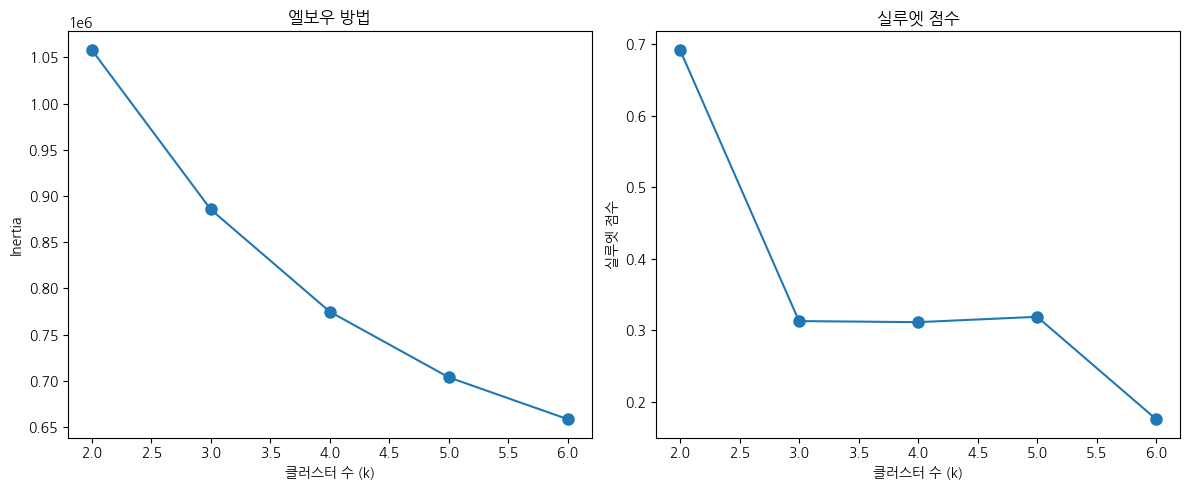

최적 클러스터 수: 2

클러스터별 고객 수:
cluster
0    94006
1     2090
Name: count, dtype: int64


In [ ]:
# 1) PCA로 차원 축소된 데이터 (X_pca) 사용

# 2) 최적 클러스터 수 탐색 (예: 2~6)
inertia = []
silhouette_scores = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"클러스터 수 {k} - 실루엣 점수: {silhouette_avg:.4f}")

# 3) 엘보우 그래프 및 실루엣 점수 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Inertia')
plt.title('엘보우 방법')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('클러스터 수 (k)')
plt.ylabel('실루엣 점수')
plt.title('실루엣 점수')

plt.tight_layout()
plt.show()

# 4) 최적 클러스터 수로 최종 클러스터링 수행 (예: 실루엣 점수 가장 높은 k 선택)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"최적 클러스터 수: {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_features['cluster'] = kmeans_final.fit_predict(X_pca)

# 5) 클러스터별 고객 수 확인
print("\n클러스터별 고객 수:")
print(customer_features['cluster'].value_counts())

In [ ]:
# 클러스터별 수치형 특성 평균값 확인
cluster_summary_num = customer_features.groupby('cluster')[numerical_features].mean()
print("클러스터별 수치형 특성 평균:")
print(cluster_summary_num)

# 클러스터별 범주형 특성 분포 확인 (예: customer_state)
for col in categorical_features:
    print(f"\n클러스터별 {col} 분포:")
    print(pd.crosstab(customer_features['cluster'], customer_features[col], normalize='index').round(3))

클러스터별 수치형 특성 평균:
         total_orders  total_items  total_spent  avg_payment_value  \
cluster                                                              
0            1.009819     1.002042   133.783595         158.973134   
1            2.158852     2.137799   238.216746         148.436142   

         avg_installments  avg_delivery_days  unique_product_categories  \
cluster                                                                   
0                2.897040          11.767912                   0.981501   
1                3.164723          11.322285                   1.654545   

         avg_product_weight  avg_product_photos  avg_review_score  \
cluster                                                             
0               2094.698659            2.210091          4.050772   
1               1985.332205            2.146096          4.222843   

         num_reviews  has_negative_review  purchase_recency  \
cluster                                                      

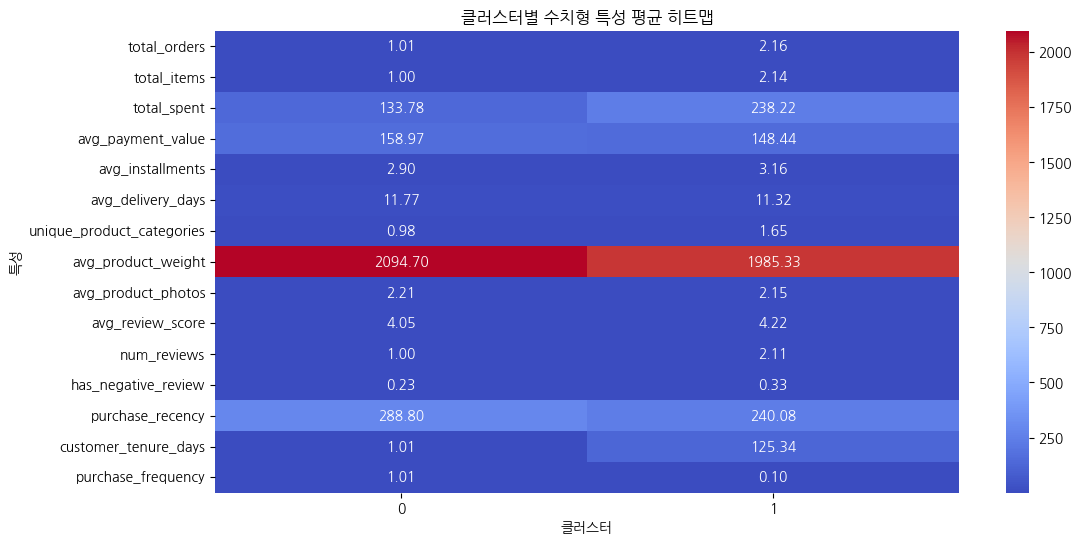

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary_num.T, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('클러스터별 수치형 특성 평균 히트맵')
plt.xlabel('클러스터')
plt.ylabel('특성')
plt.show()

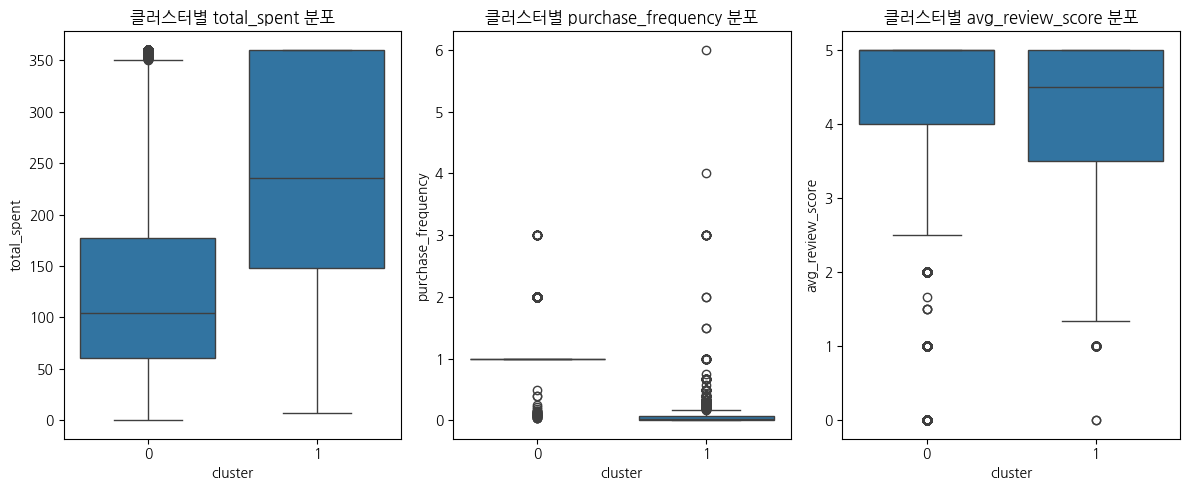

In [ ]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(['total_spent', 'purchase_frequency', 'avg_review_score']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='cluster', y=col, data=customer_features)
    plt.title(f'클러스터별 {col} 분포')

plt.tight_layout()
plt.show()

In [ ]:
# 각 customer_unique_id가 몇 개의 고유한 order_id를 가지고 있는지 확인
orders_per_customer = df_merged.groupby('customer_unique_id')['order_id'].nunique()

print("주문이 1개인 고객 수:", (orders_per_customer == 1).sum())
print("주문이 2개 이상인 고객 수:", (orders_per_customer > 1).sum())
print("총 고객 수:", len(orders_per_customer))

주문이 1개인 고객 수: 93099
주문이 2개 이상인 고객 수: 2997
총 고객 수: 96096


In [ ]:
# 주문 데이터에서 고객별 첫 구매일 추출
first_purchase = df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_unique_id', 'first_purchase_date']

# 첫 구매 월을 코호트로 정의
first_purchase['cohort_month'] = pd.to_datetime(first_purchase['first_purchase_date']).dt.to_period('M')

# 고객 세그먼트 정보와 병합
cohort_data = pd.merge(first_purchase, customer_features[['customer_unique_id', 'cluster']], on='customer_unique_id', how='left')

In [ ]:
orders_with_cohort = pd.merge(df_merged, cohort_data, on='customer_unique_id', how='left')

# 주문 월 추출
orders_with_cohort['order_month'] = pd.to_datetime(orders_with_cohort['order_purchase_timestamp']).dt.to_period('M')

# 코호트 기간 계산 (첫 구매 월부터 경과한 개월 수)
orders_with_cohort['cohort_period'] = (orders_with_cohort['order_month'] - orders_with_cohort['cohort_month']).apply(lambda x: x.n)

# 세그먼트별 코호트 분석 - 고객 유지율
def create_cohort_table(data, segment):
    # 해당 세그먼트만 필터링
    segment_data = data[data['cluster'] == segment]

    # 코호트 크기 계산 (각 코호트 월별 고유 고객 수)
    cohort_sizes = segment_data.groupby('cohort_month')['customer_unique_id'].nunique()

    # 각 코호트 기간별 고유 고객 수 계산
    cohort_data = segment_data.groupby(['cohort_month', 'cohort_period'])['customer_unique_id'].nunique().reset_index()

    # 피벗 테이블 생성
    cohort_table = cohort_data.pivot_table(index='cohort_month', columns='cohort_period', values='customer_unique_id')

    # 유지율 계산
    cohort_table_percentage = cohort_table.divide(cohort_sizes, axis=0) * 100

    return cohort_table_percentage

# 세그먼트 0 (일회성 구매자) 코호트 테이블
cohort_table_segment_0 = create_cohort_table(orders_with_cohort, 0)

# 세그먼트 1 (충성 고객) 코호트 테이블
cohort_table_segment_1 = create_cohort_table(orders_with_cohort, 1)

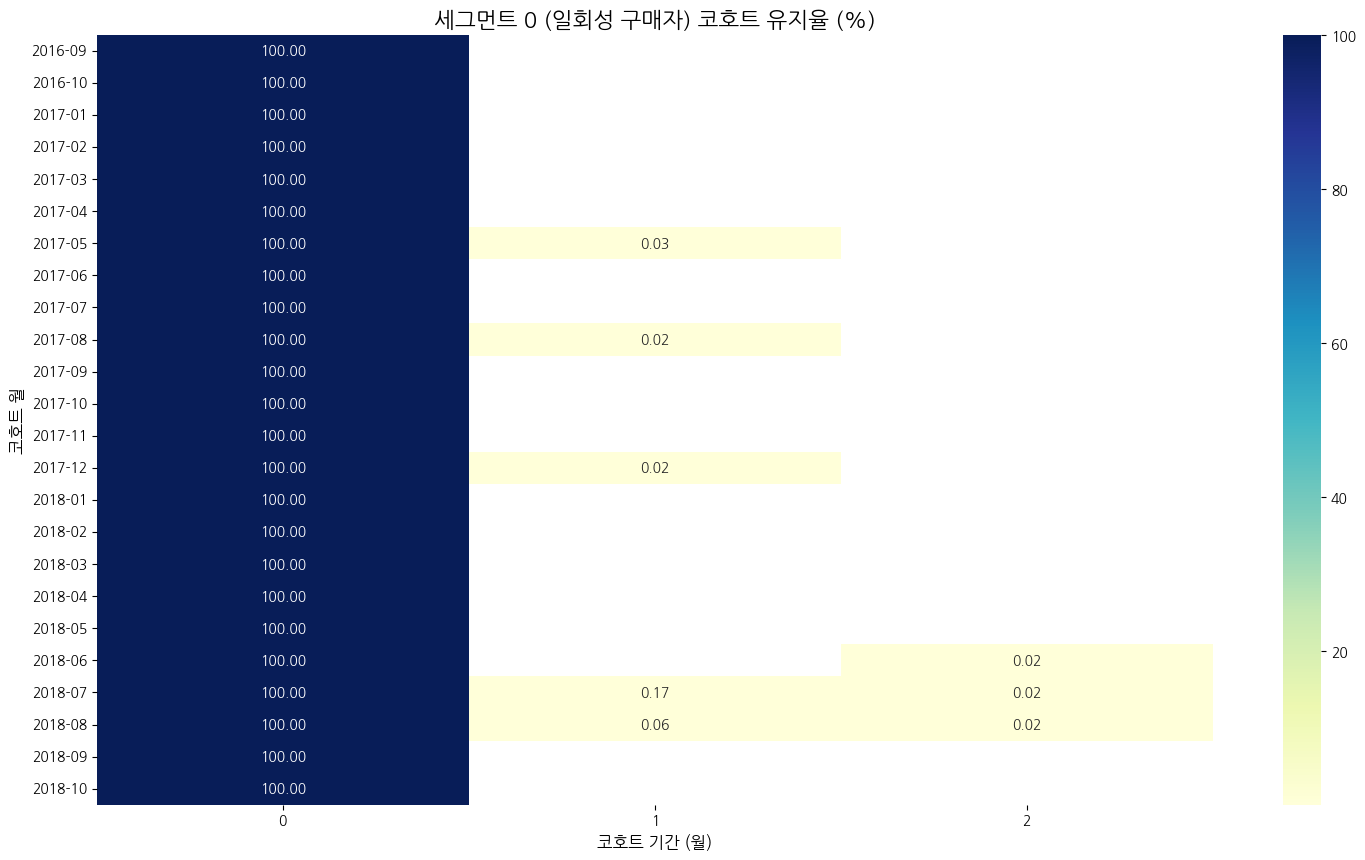

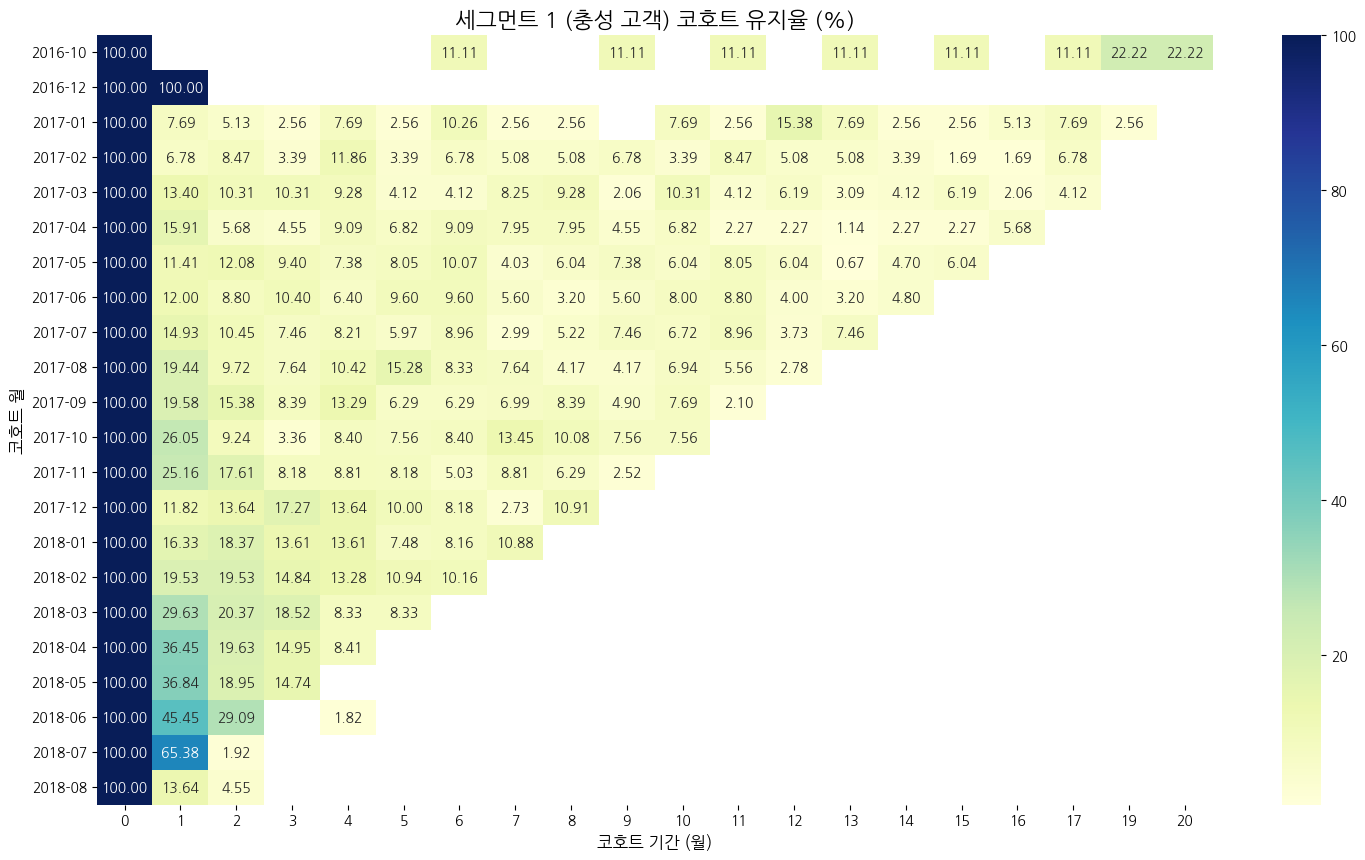

In [ ]:
# 시각화 함수
def plot_cohort_heatmap(cohort_table, title):
    plt.figure(figsize=(18, 10))
    sns.heatmap(cohort_table, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(title, fontsize=16)
    plt.xlabel('코호트 기간 (월)', fontsize=12)
    plt.ylabel('코호트 월', fontsize=12)
    plt.show()

# 세그먼트 0 (일회성 구매자) 코호트 히트맵
plot_cohort_heatmap(cohort_table_segment_0, '세그먼트 0 (일회성 구매자) 코호트 유지율 (%)')

# 세그먼트 1 (충성 고객) 코호트 히트맵
plot_cohort_heatmap(cohort_table_segment_1, '세그먼트 1 (충성 고객) 코호트 유지율 (%)')

In [ ]:
# 주문 금액 정보 추가 (order_payments_df에서 가져옴)
orders_with_amount = pd.merge(orders_with_cohort,
                             order_payments_df.groupby('order_id')['payment_value'].sum().reset_index(),
                             on='order_id', how='left')

# 세그먼트별 평균 구매 금액 코호트 테이블 생성
def create_amount_cohort_table(data, segment, amount_column='payment_value_x'):
    # 해당 세그먼트만 필터링
    segment_data = data[data['cluster'] == segment]

    # 컬럼 존재 여부 확인
    if amount_column not in segment_data.columns:
        print(f"'{amount_column}' 컬럼이 데이터프레임에 존재하지 않습니다.")
        print("사용 가능한 컬럼:", segment_data.columns)
        return None

    # 코호트 기간별 평균 구매 금액 계산
    cohort_data = segment_data.groupby(['cohort_month', 'cohort_period'])[amount_column].mean().reset_index()

    # 피벗 테이블 생성
    cohort_table = cohort_data.pivot_table(index='cohort_month', columns='cohort_period', values=amount_column)

    return cohort_table

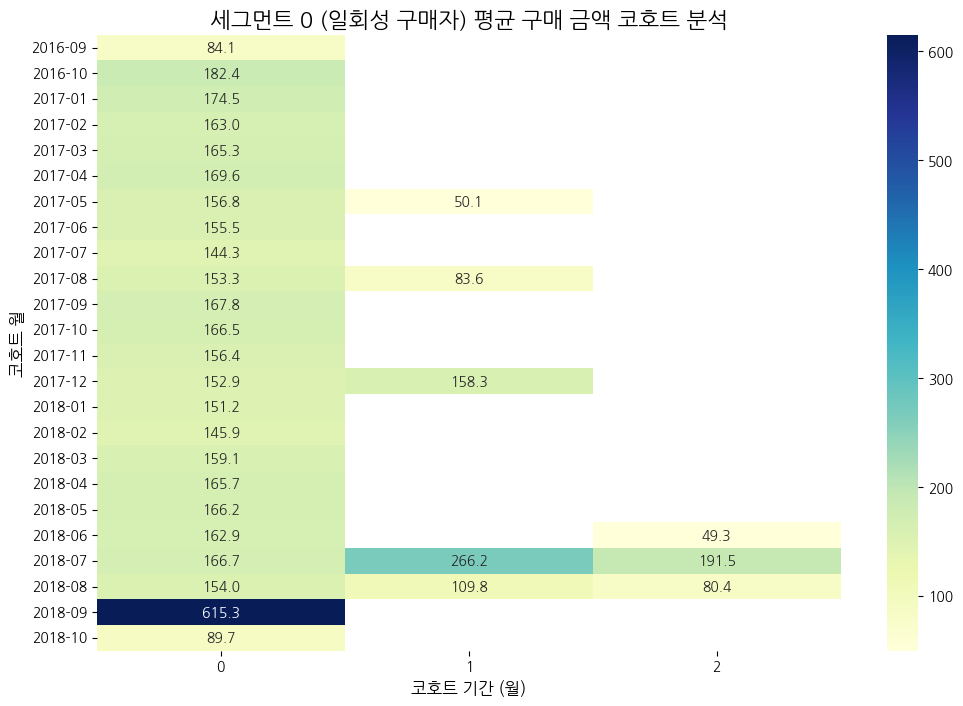

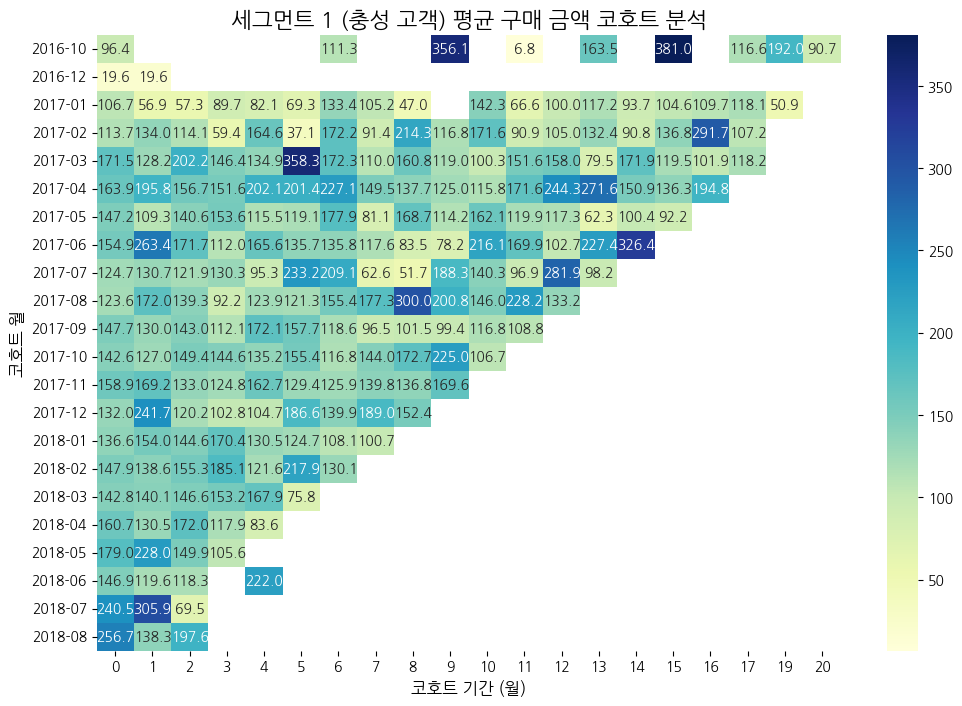

In [ ]:
# 세그먼트 0 평균 구매 금액 코호트 테이블
amount_cohort_table_segment_0 = create_amount_cohort_table(orders_with_amount, 0)

# 세그먼트 1 평균 구매 금액 코호트 테이블
amount_cohort_table_segment_1 = create_amount_cohort_table(orders_with_amount, 1)


def plot_cohort_heatmap(cohort_table, title):
    # 데이터프레임이 비어있는지 확인
    if cohort_table.empty:
        print(f"{title} - 시각화할 데이터가 없습니다.")
        return

    # 데이터가 있으면 시각화 진행
    plt.figure(figsize=(12, 8))
    sns.heatmap(cohort_table, annot=True, cmap='YlGnBu', fmt='.1f')
    plt.title(title, fontsize=16)
    plt.xlabel('코호트 기간 (월)', fontsize=12)
    plt.ylabel('코호트 월', fontsize=12)
    plt.show()

plot_cohort_heatmap(amount_cohort_table_segment_0, '세그먼트 0 (일회성 구매자) 평균 구매 금액 코호트 분석')
plot_cohort_heatmap(amount_cohort_table_segment_1, '세그먼트 1 (충성 고객) 평균 구매 금액 코호트 분석')

In [ ]:
# 세그먼트별 평균 리뷰 점수 계산
segment_review_avg = customer_features.groupby('cluster')['avg_review_score'].mean().reset_index()

# 결과 출력
print(segment_review_avg)

   cluster  avg_review_score
0        0          4.050772
1        1          4.222843


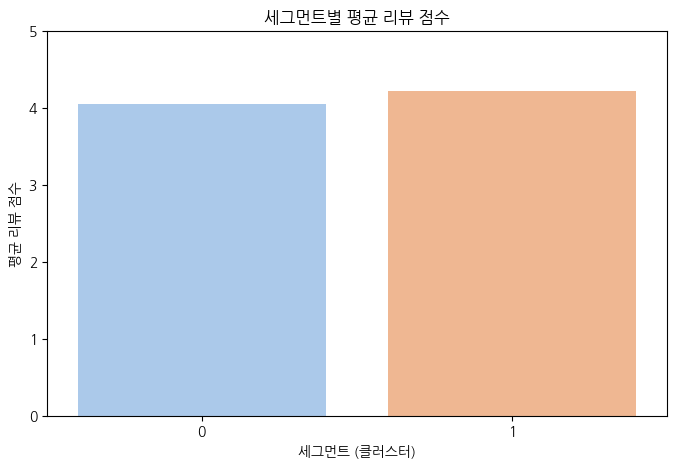

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_review_avg, x='cluster', y='avg_review_score', palette='pastel')
plt.title('세그먼트별 평균 리뷰 점수')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('평균 리뷰 점수')
plt.ylim(0, 5)  # 리뷰 점수 범위가 1~5점이라 가정
plt.show()


세그먼트별 평균 배송 지연 일수:
   cluster  avg_delivery_delay_days
0        0               -11.831074
1        1               -12.646733


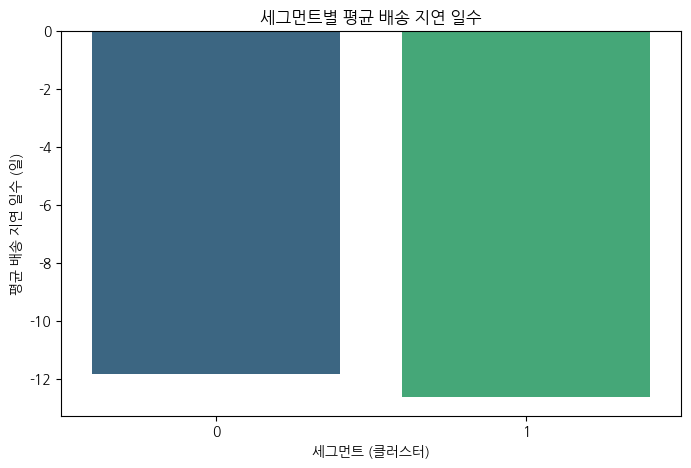

In [ ]:
# orders_df와 customers_df 병합하여 customer_unique_id 추가
orders_with_customer = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# 이제 배송 지연 일수 계산
orders_with_customer['delivery_delay_days'] = (orders_with_customer['order_delivered_customer_date'] -
                                              orders_with_customer['order_estimated_delivery_date']).dt.days

# 고객별 평균 배송 지연 일수 계산
customer_avg_delay = orders_with_customer.groupby('customer_unique_id')['delivery_delay_days'].mean().reset_index()
customer_avg_delay.columns = ['customer_unique_id', 'avg_delivery_delay_days']

# customer_features에 병합
customer_features = pd.merge(customer_features, customer_avg_delay, on='customer_unique_id', how='left')

# 세그먼트별 평균 배송 지연 일수 분석
segment_delay_avg = customer_features.groupby('cluster')['avg_delivery_delay_days'].mean().reset_index()
print("\n세그먼트별 평균 배송 지연 일수:")
print(segment_delay_avg)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_delay_avg, x='cluster', y='avg_delivery_delay_days', palette='viridis')
plt.title('세그먼트별 평균 배송 지연 일수')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('평균 배송 지연 일수 (일)')
plt.show()


세그먼트별 평균 할부 개월 수:
   cluster  avg_installments
0        0          2.897040
1        1          3.164723


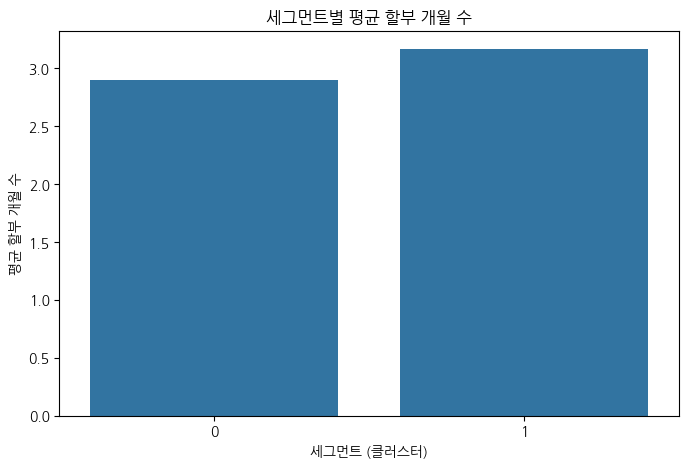

In [ ]:
# 세그먼트별 평균 할부 개월 수 분석
segment_installments = customer_features.groupby('cluster')['avg_installments'].mean().reset_index()
print("\n세그먼트별 평균 할부 개월 수:")
print(segment_installments)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_installments, x='cluster', y='avg_installments')
plt.title('세그먼트별 평균 할부 개월 수')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('평균 할부 개월 수')
plt.show()


세그먼트별 평균 구매 카테고리 다양성:
   cluster  unique_product_categories
0        0                   0.981501
1        1                   1.654545


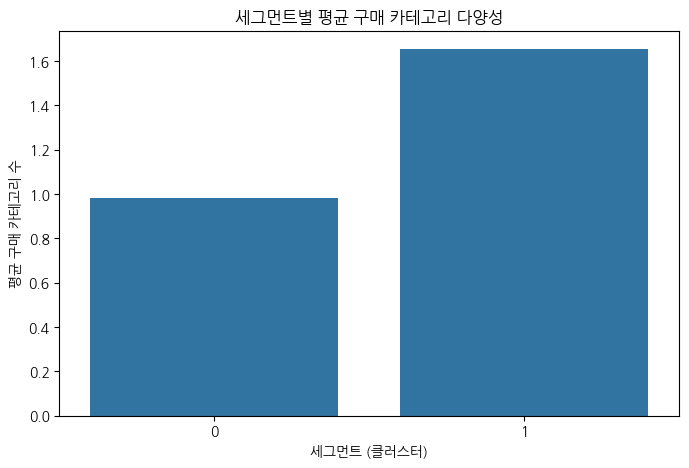

In [ ]:
# 세그먼트별 카테고리 다양성 분석
segment_category_diversity = customer_features.groupby('cluster')['unique_product_categories'].mean().reset_index()
print("\n세그먼트별 평균 구매 카테고리 다양성:")
print(segment_category_diversity)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_category_diversity, x='cluster', y='unique_product_categories')
plt.title('세그먼트별 평균 구매 카테고리 다양성')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('평균 구매 카테고리 수')
plt.show()


세그먼트별 평균 배송 소요일:
   cluster  avg_delivery_days
0        0          11.767912
1        1          11.322285


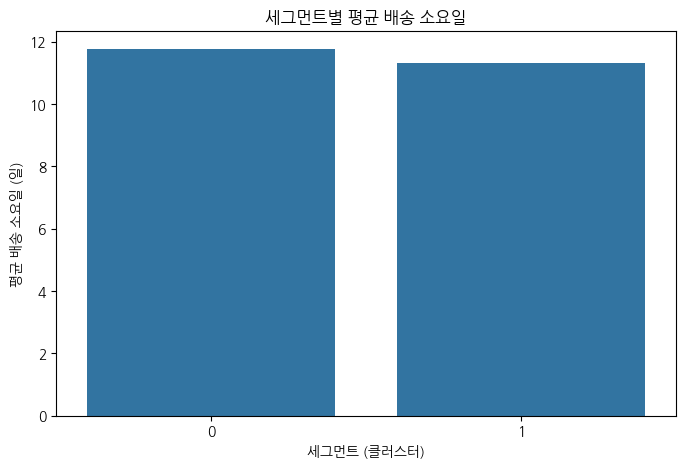

In [ ]:
# 세그먼트별 평균 배송 소요일 분석
segment_delivery = customer_features.groupby('cluster')['avg_delivery_days'].mean().reset_index()
print("\n세그먼트별 평균 배송 소요일:")
print(segment_delivery)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_delivery, x='cluster', y='avg_delivery_days')
plt.title('세그먼트별 평균 배송 소요일')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('평균 배송 소요일 (일)')
plt.show()


세그먼트별 부정적 리뷰 비율:
   cluster  has_negative_review
0        0             0.229049
1        1             0.325837


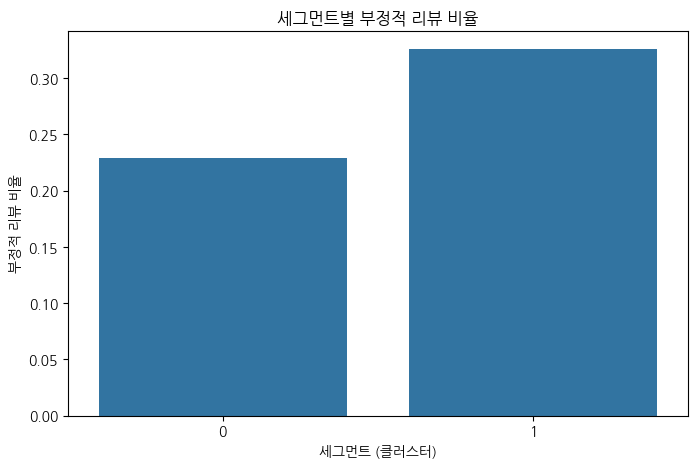

In [ ]:
# 세그먼트별 부정적 리뷰 비율 분석
segment_negative_review = customer_features.groupby('cluster')['has_negative_review'].mean().reset_index()
print("\n세그먼트별 부정적 리뷰 비율:")
print(segment_negative_review)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_negative_review, x='cluster', y='has_negative_review')
plt.title('세그먼트별 부정적 리뷰 비율')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('부정적 리뷰 비율')
plt.show()


세그먼트별 구매 행동 종합 분석:
   cluster  total_orders  total_items  total_spent  avg_payment_value  \
0        0      1.009819     1.002042   133.783595         158.973134   
1        1      2.158852     2.137799   238.216746         148.436142   

   purchase_recency  customer_tenure_days  purchase_frequency  
0        288.795194              1.007308            1.009057  
1        240.080383            125.343541            0.101378  


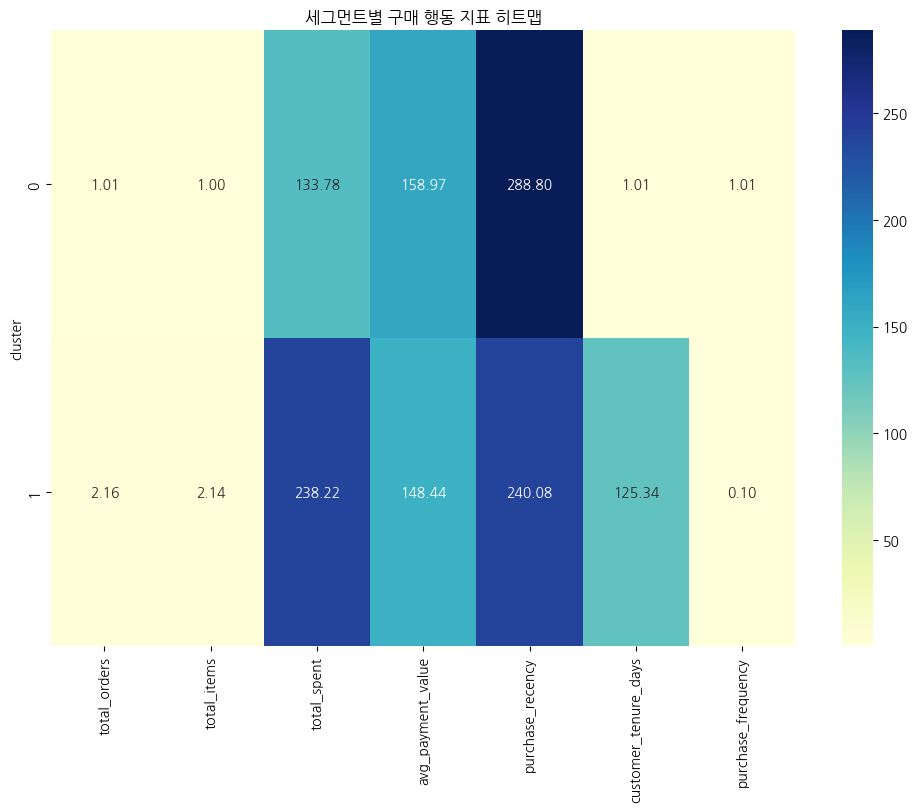

In [ ]:
# 세그먼트별 주요 구매 행동 지표 종합 분석
segment_behavior = customer_features.groupby('cluster').agg({
    'total_orders': 'mean',
    'total_items': 'mean',
    'total_spent': 'mean',
    'avg_payment_value': 'mean',
    'purchase_recency': 'mean',
    'customer_tenure_days': 'mean',
    'purchase_frequency': 'mean'
}).reset_index()

print("\n세그먼트별 구매 행동 종합 분석:")
print(segment_behavior)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
behavior_pivot = segment_behavior.set_index('cluster')
sns.heatmap(behavior_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('세그먼트별 구매 행동 지표 히트맵')
plt.show()


세그먼트별 주(state) 분포 (상위 5개):
customer_state        SP        RJ        MG        RS        PR
cluster                                                         
0               0.418729  0.128481  0.117216  0.054933  0.050827
1               0.445933  0.143062  0.112919  0.054067  0.049761


<Figure size 1200x600 with 0 Axes>

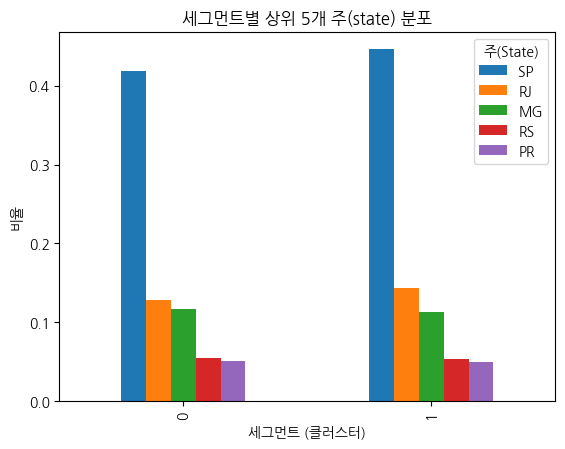

In [ ]:
# 세그먼트별 주(state) 분포 분석
state_dist = pd.crosstab(customer_features['cluster'], customer_features['customer_state'], normalize='index')
print("\n세그먼트별 주(state) 분포 (상위 5개):")
print(state_dist.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1))

# 시각화 - 상위 5개 주만 표시
top_states = state_dist.mean().sort_values(ascending=False).head(5).index
state_dist_top = state_dist[top_states]

plt.figure(figsize=(12, 6))
state_dist_top.plot(kind='bar', stacked=False)
plt.title('세그먼트별 상위 5개 주(state) 분포')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('비율')
plt.legend(title='주(State)')
plt.show()


세그먼트별 상품 특성:
   cluster  avg_product_weight  avg_product_photos
0        0         2094.698659            2.210091
1        1         1985.332205            2.146096


Text(0, 0.5, '평균 상품 무게')

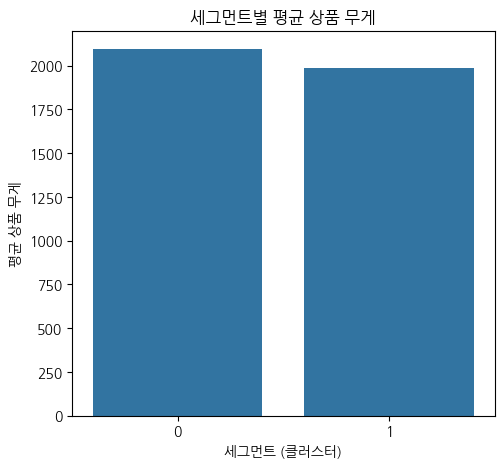

In [ ]:
# 세그먼트별 상품 특성 분석
segment_product = customer_features.groupby('cluster').agg({
    'avg_product_weight': 'mean',
    'avg_product_photos': 'mean'
}).reset_index()

print("\n세그먼트별 상품 특성:")
print(segment_product)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=segment_product, x='cluster', y='avg_product_weight')
plt.title('세그먼트별 평균 상품 무게')
plt.xlabel('세그먼트 (클러스터)')
plt.ylabel('평균 상품 무게')

In [ ]:
# orders_df, order_items_df, products_df, customers_df 병합
orders_with_customer = pd.merge(orders_df, customers_df, on='customer_id', how='left')
orders_with_items = pd.merge(orders_with_customer, orders_items_df, on='order_id', how='left')
orders_with_products = pd.merge(orders_with_items, products_df, on='product_id', how='left')

# 세그먼트 정보 병합
orders_with_products = pd.merge(orders_with_products, customer_features[['customer_unique_id', 'cluster']], on='customer_unique_id', how='left')

# 세그먼트별 카테고리별 구매 횟수 집계
category_counts = orders_with_products.groupby(['cluster', 'product_category_name']).size().reset_index(name='purchase_count')

# 세그먼트별 총 구매 횟수
total_counts = category_counts.groupby('cluster')['purchase_count'].sum().reset_index(name='total_purchase')

# 구매 비율 계산
category_counts = pd.merge(category_counts, total_counts, on='cluster')
category_counts['purchase_ratio'] = category_counts['purchase_count'] / category_counts['total_purchase']

# 세그먼트별 상위 5개 카테고리 추출
top_categories = category_counts.groupby('cluster').apply(lambda x: x.nlargest(5, 'purchase_ratio')).reset_index(drop=True)

print(top_categories[['cluster', 'product_category_name', 'purchase_ratio']])

   cluster   product_category_name  purchase_ratio
0        0         cama_mesa_banho        0.098307
1        0            beleza_saude        0.087812
2        0           esporte_lazer        0.077109
3        0        moveis_decoracao        0.074118
4        0  informatica_acessorios        0.070692
5        1         cama_mesa_banho        0.135180
6        1        moveis_decoracao        0.093343
7        1           esporte_lazer        0.091670
8        1            beleza_saude        0.072704
9        1   utilidades_domesticas        0.067311


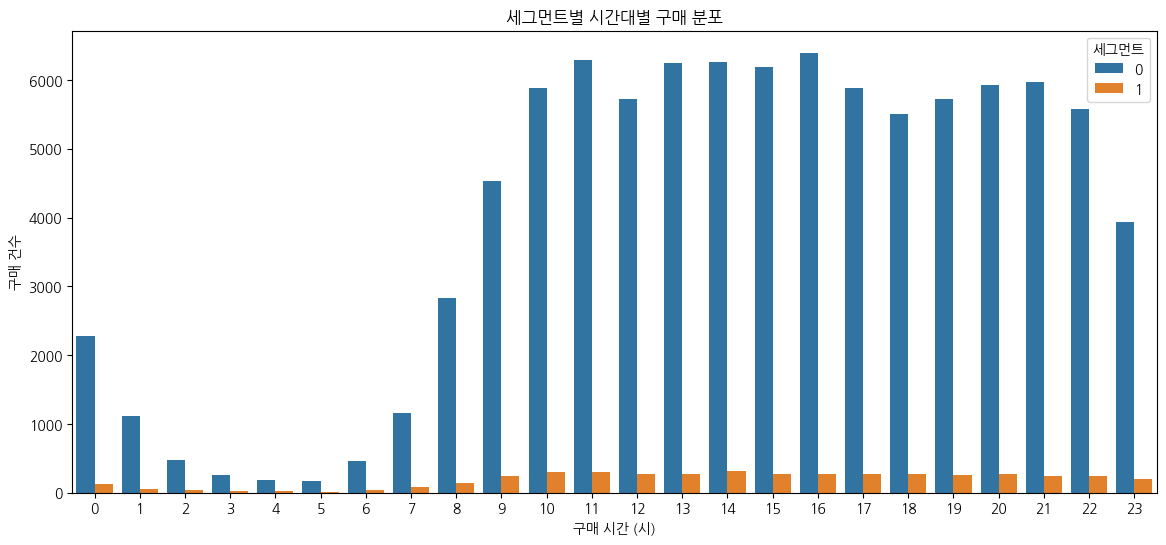

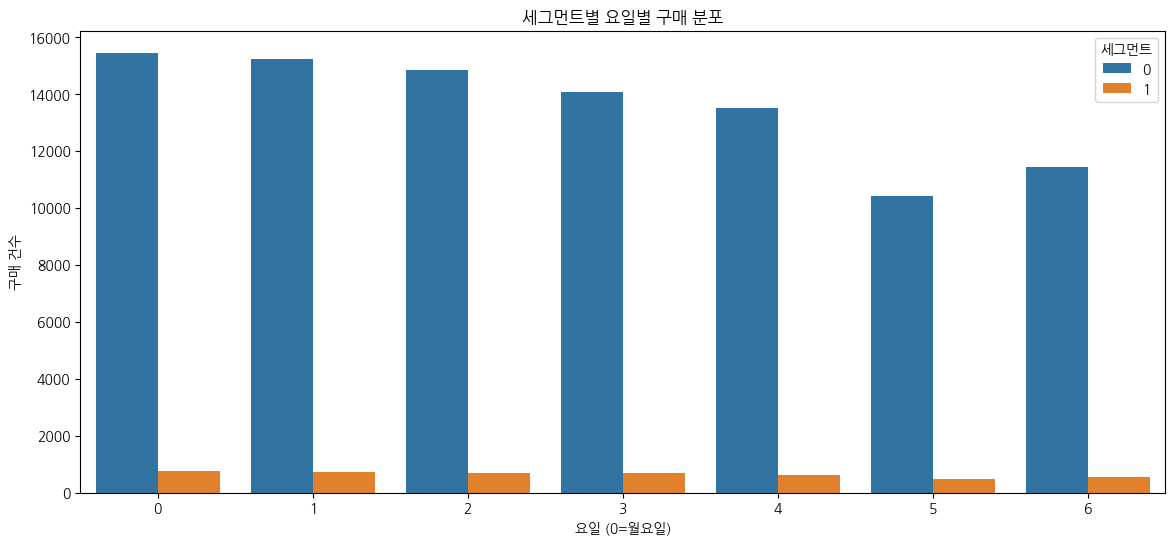

In [ ]:
# 주문 시각 datetime 변환
orders_with_customer['order_hour'] = pd.to_datetime(orders_with_customer['order_purchase_timestamp']).dt.hour
orders_with_customer['order_dayofweek'] = pd.to_datetime(orders_with_customer['order_purchase_timestamp']).dt.dayofweek

# 세그먼트 정보 병합
orders_with_customer = pd.merge(orders_with_customer, customer_features[['customer_unique_id', 'cluster']], on='customer_unique_id', how='left')

# 시간대별 구매 분포
plt.figure(figsize=(14, 6))
sns.countplot(data=orders_with_customer, x='order_hour', hue='cluster')
plt.title('세그먼트별 시간대별 구매 분포')
plt.xlabel('구매 시간 (시)')
plt.ylabel('구매 건수')
plt.legend(title='세그먼트')
plt.show()

# 요일별 구매 분포
plt.figure(figsize=(14, 6))
sns.countplot(data=orders_with_customer, x='order_dayofweek', hue='cluster')
plt.title('세그먼트별 요일별 구매 분포')
plt.xlabel('요일 (0=월요일)')
plt.ylabel('구매 건수')
plt.legend(title='세그먼트')
plt.show()

           count        mean         std  min   25%   50%    75%    max
cluster                                                                
0        94006.0    1.007308    0.465020  1.0   1.0   1.0    1.0   61.0
1         2090.0  125.343541  120.506743  1.0  28.0  83.0  193.0  634.0


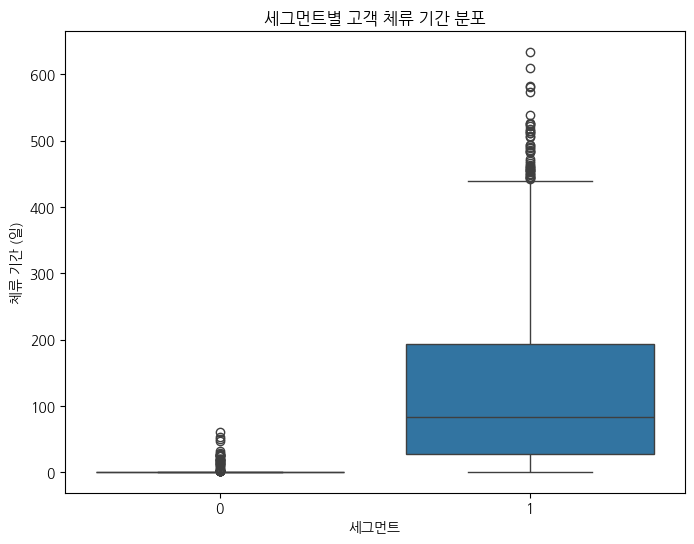

In [ ]:
# 고객별 첫 구매일과 마지막 구매일 계산
purchase_dates = orders_with_customer.groupby('customer_unique_id')['order_purchase_timestamp'].agg(['min', 'max']).reset_index()
purchase_dates.columns = ['customer_unique_id', 'first_purchase', 'last_purchase']

# 체류 기간 계산 (일 단위)
purchase_dates['tenure_days'] = (pd.to_datetime(purchase_dates['last_purchase']) - pd.to_datetime(purchase_dates['first_purchase'])).dt.days + 1

# 세그먼트 정보 병합
purchase_dates = pd.merge(purchase_dates, customer_features[['customer_unique_id', 'cluster']], on='customer_unique_id', how='left')

# 세그먼트별 체류 기간 통계
tenure_stats = purchase_dates.groupby('cluster')['tenure_days'].describe()
print(tenure_stats)

# 시각화 - 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(data=purchase_dates, x='cluster', y='tenure_days')
plt.title('세그먼트별 고객 체류 기간 분포')
plt.xlabel('세그먼트')
plt.ylabel('체류 기간 (일)')
plt.show()